In [75]:
!pip install pandas numpy scikit-learn matplotlib seaborn imblearn



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import preprocessing

In [8]:
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

Data import

In [9]:
airline_data = pd.read_csv("test.csv")
airline_data.head(6)

Unnamed: 0     id  Gender      Customer Type  Age   Type of Travel  \
0           0  19556  Female     Loyal Customer   52  Business travel   
1           1  90035  Female     Loyal Customer   36  Business travel   
2           2  12360    Male  disloyal Customer   20  Business travel   
3           3  77959    Male     Loyal Customer   44  Business travel   
4           4  36875  Female     Loyal Customer   49  Business travel   
5           5  39177    Male     Loyal Customer   16  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0       Eco              160                      5   
1  Business             2863                      1   
2       Eco              192                      2   
3  Business             3377                      0   
4       Eco             1182                      2   
5       Eco              311                      3   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  1  ...                       4   
2                                  0  ...                       2   
3                                  0  ...                       1   
4                                  3  ...                       2   
5                                  3  ...                       5   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 5                 5                 5                2   
1                 4                 4                 4                3   
2                 4                 1                 3                2   
3                 1                 1                 1                3   
4                 2                 2                 2                4   
5                 4                 3                 1                1   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          50   
1                 4            5                           0   
2                 2            2                           0   
3                 1            4                           0   
4                 2            4                           0   
5                 2            5                           0   

   Arrival Delay in Minutes             satisfaction  
0                      44.0                satisfied  
1                       0.0                satisfied  
2                       0.0  neutral or dissatisfied  
3                       6.0                satisfied  
4                      20.0                satisfied  
5                       0.0                satisfied  

[6 rows x 25 columns]

# Data Cleanup

In [10]:
columns_to_drop = ['Unnamed: 0', 'id']
airline_data = airline_data.drop(columns=columns_to_drop, axis=1)
airline_data.head(6)

Gender      Customer Type  Age   Type of Travel     Class  Flight Distance  \
0  Female     Loyal Customer   52  Business travel       Eco              160   
1  Female     Loyal Customer   36  Business travel  Business             2863   
2    Male  disloyal Customer   20  Business travel       Eco              192   
3    Male     Loyal Customer   44  Business travel  Business             3377   
4  Female     Loyal Customer   49  Business travel       Eco             1182   
5    Male     Loyal Customer   16  Business travel       Eco              311   

   Inflight wifi service  Departure/Arrival time convenient  \
0                      5                                  4   
1                      1                                  1   
2                      2                                  0   
3                      0                                  0   
4                      2                                  3   
5                      3                                  3   

   Ease of Online booking  Gate location  ...  Inflight entertainment  \
0                       3              4  ...                       5   
1                       3              1  ...                       4   
2                       2              4  ...                       2   
3                       0              2  ...                       1   
4                       4              3  ...                       2   
5                       3              3  ...                       5   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 5                 5                 5                2   
1                 4                 4                 4                3   
2                 4                 1                 3                2   
3                 1                 1                 1                3   
4                 2                 2                 2                4   
5                 4                 3                 1                1   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          50   
1                 4            5                           0   
2                 2            2                           0   
3                 1            4                           0   
4                 2            4                           0   
5                 2            5                           0   

   Arrival Delay in Minutes             satisfaction  
0                      44.0                satisfied  
1                       0.0                satisfied  
2                       0.0  neutral or dissatisfied  
3                       6.0                satisfied  
4                      20.0                satisfied  
5                       0.0                satisfied  

[6 rows x 23 columns]

I dropped unecessary colomns such as id and numeric-index

In [11]:
print(airline_data.shape)
print(airline_data.dtypes)

(25976, 23)
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float6

In [12]:
airline_data.isnull().values.any()

np.True_

In [13]:
airline_data.isnull().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

Over here, I can see that there are some null values for Arrival delay in minutes. Normally we would remove all null rows, but intuition suggests that null might equal to 0 or no delay. So, I performed a data check, but after checking the data, it was found that there are indeed some values where 0 was written. Therefore Null does not necessarily equal 0. Therefore, since kaggle does not have the right data information provided, those rows with null values, needs to be dropped.

In [14]:
airline_data = airline_data.dropna(subset=['Arrival Delay in Minutes'])
airline_data.isnull().values.any()

np.False_

The data is now clean, now I will divide the features and the label, in different data-frames, to be used later

In [15]:
airline_features = airline_data.iloc[:,0:22] # Independent variables
airline_satisfaction = airline_data['satisfaction'] # Outcome variable
airline_features.head()

Gender      Customer Type  Age   Type of Travel     Class  Flight Distance  \
0  Female     Loyal Customer   52  Business travel       Eco              160   
1  Female     Loyal Customer   36  Business travel  Business             2863   
2    Male  disloyal Customer   20  Business travel       Eco              192   
3    Male     Loyal Customer   44  Business travel  Business             3377   
4  Female     Loyal Customer   49  Business travel       Eco             1182   

   Inflight wifi service  Departure/Arrival time convenient  \
0                      5                                  4   
1                      1                                  1   
2                      2                                  0   
3                      0                                  0   
4                      2                                  3   

   Ease of Online booking  Gate location  ...  Seat comfort  \
0                       3              4  ...             3   
1                       3              1  ...             5   
2                       2              4  ...             2   
3                       0              2  ...             4   
4                       4              3  ...             2   

   Inflight entertainment  On-board service  Leg room service  \
0                       5                 5                 5   
1                       4                 4                 4   
2                       2                 4                 1   
3                       1                 1                 1   
4                       2                 2                 2   

   Baggage handling  Checkin service  Inflight service  Cleanliness  \
0                 5                2                 5            5   
1                 4                3                 4            5   
2                 3                2                 2            2   
3                 1                3                 1            4   
4                 2                4                 2            4   

   Departure Delay in Minutes  Arrival Delay in Minutes  
0                          50                      44.0  
1                           0                       0.0  
2                           0                       0.0  
3                           0                       6.0  
4                           0                      20.0  

[5 rows x 22 columns]

In [16]:
airline_satisfaction.head()

0                  satisfied
1                  satisfied
2    neutral or dissatisfied
3                  satisfied
4                  satisfied
Name: satisfaction, dtype: object

The data has been cleaned now

# Exploratory Data Analysis

The central goal for EDA would be to examine the overall dataset and perform feature reduction and data inspection, to build a clean model. To perform this, I will follow the following steps, in this order to get the best result:

## Analysis for Target

<Axes: xlabel='satisfaction', ylabel='count'>

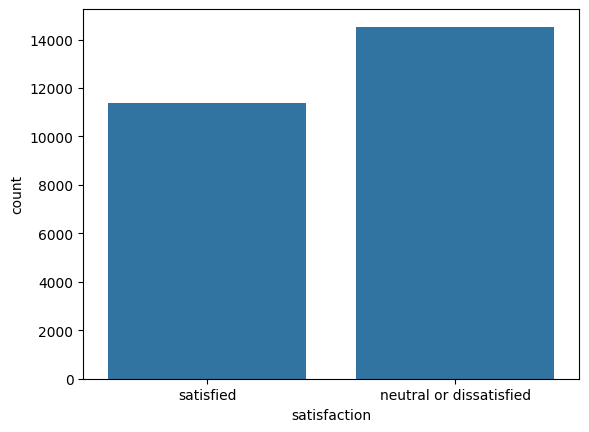

In [17]:
sns.countplot(x='satisfaction', data=airline_data)

This plot reveals that the final outcome variable of satisfaction is almost equally distributed. Therefore, no new false dummy value creation of sorts is required

## Univariate Analysis

Goal: I will examine each feature individually to understand its distribution, variability, and potential for feature reduction.

### "Continuous Numerical Features" Data Analysis

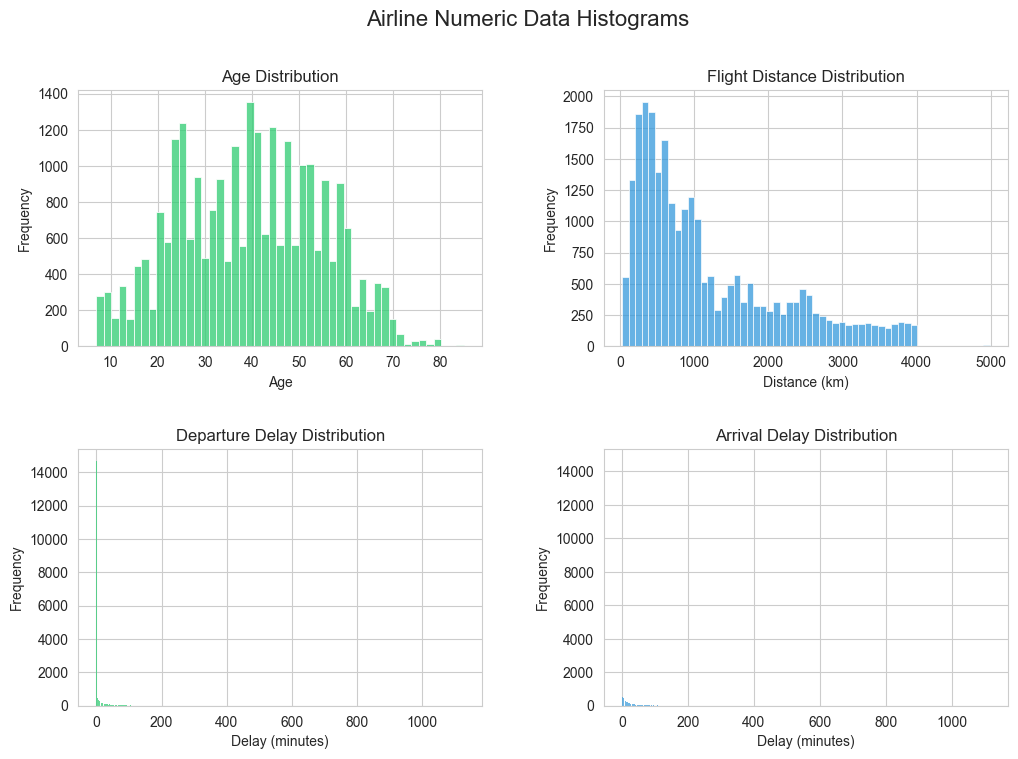

In [18]:
# Set a more visually appealing theme
sns.set_style("whitegrid")

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

sns.histplot(airline_data['Age'], color='#2ecc71', fill=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')

sns.histplot(airline_data['Flight Distance'], color='#3498db', fill=True, ax=axes[0, 1])
axes[0, 1].set_title('Flight Distance Distribution')
axes[0, 1].set_xlabel('Distance (km)')
axes[0, 1].set_ylabel('Frequency')

sns.histplot(airline_data['Departure Delay in Minutes'], color='#2ecc71', fill=True, ax=axes[1, 0])
axes[1, 0].set_title('Departure Delay Distribution')
axes[1, 0].set_xlabel('Delay (minutes)')
axes[1, 0].set_ylabel('Frequency')

sns.histplot(airline_data['Arrival Delay in Minutes'], color='#3498db', fill=True, ax=axes[1, 1])
axes[1, 1].set_title('Arrival Delay Distribution')
axes[1, 1].set_xlabel('Delay (minutes)')
axes[1, 1].set_ylabel('Frequency')

fig.suptitle('Airline Numeric Data Histograms', fontsize=16)

# Show the plot
plt.show()


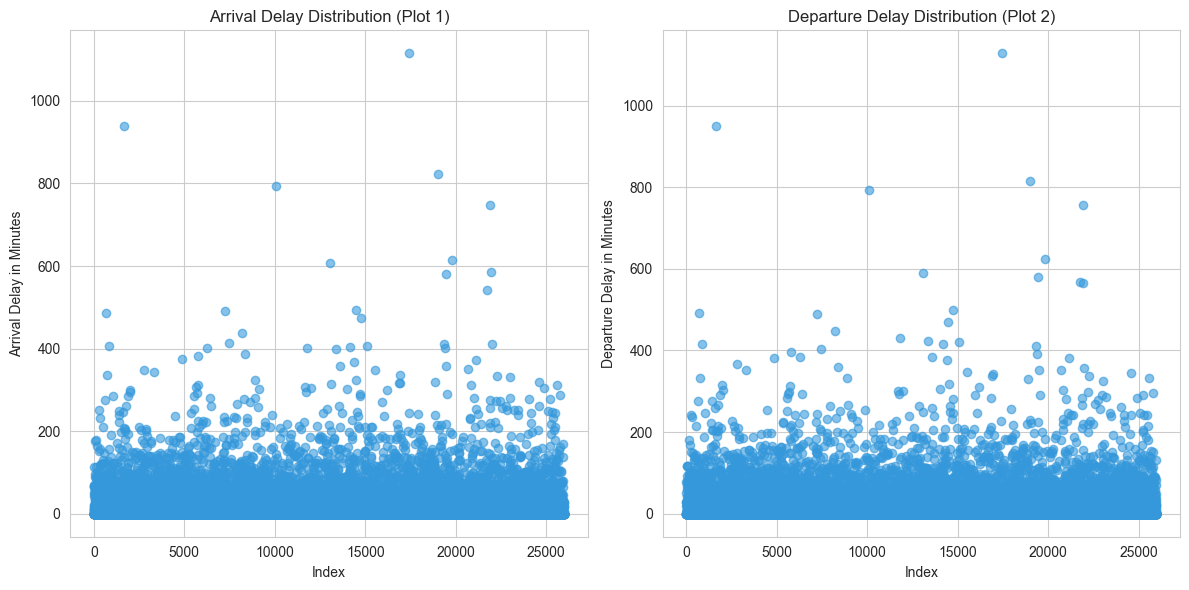

In [19]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Use axes[0] and axes[1] to call scatter on each subplot
axes[0].scatter(x=airline_data.index, y=airline_data['Arrival Delay in Minutes'], color='#3498db', alpha=0.6)
axes[0].set_title('Arrival Delay Distribution (Plot 1)')
axes[0].set_xlabel('Index')
axes[0].set_ylabel('Arrival Delay in Minutes')

axes[1].scatter(x=airline_data.index, y=airline_data['Departure Delay in Minutes'], color='#3498db', alpha=0.6)
axes[1].set_title('Departure Delay Distribution (Plot 2)')
axes[1].set_xlabel('Index')
axes[1].set_ylabel('Departure Delay in Minutes')

# Adjust spacing between the plots
plt.tight_layout()

# Show the plot
plt.show()


### "Discrete Numerical Features" Data Analysis

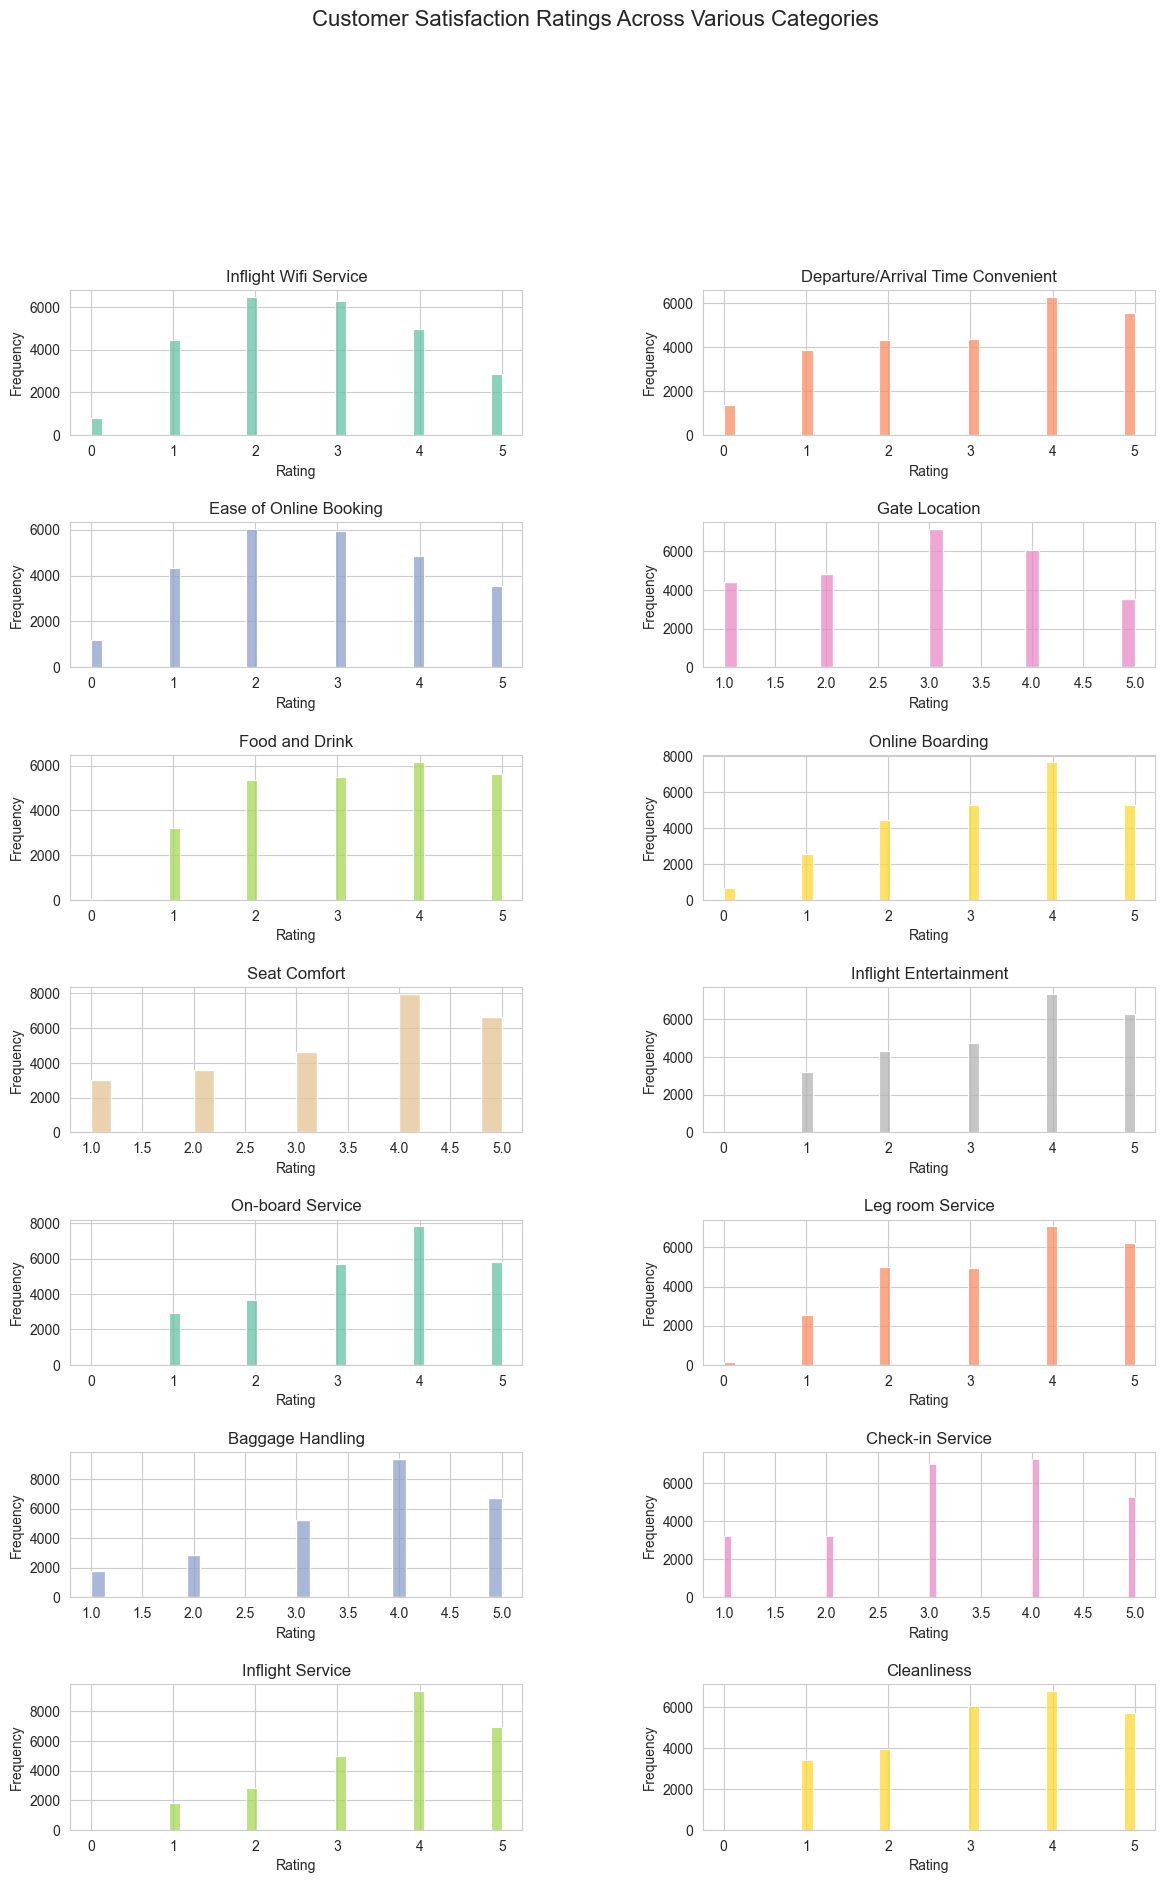

In [20]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(14, 20))
plt.subplots_adjust(hspace=0.6, wspace=0.4)
palette = sns.color_palette("Set2")

# List of attributes to plot and their titles
attributes = [
    ('Inflight wifi service', 'Inflight Wifi Service'),
    ('Departure/Arrival time convenient', 'Departure/Arrival Time Convenient'),
    ('Ease of Online booking', 'Ease of Online Booking'),
    ('Gate location', 'Gate Location'),
    ('Food and drink', 'Food and Drink'),
    ('Online boarding', 'Online Boarding'),
    ('Seat comfort', 'Seat Comfort'),
    ('Inflight entertainment', 'Inflight Entertainment'),
    ('On-board service', 'On-board Service'),
    ('Leg room service', 'Leg room Service'),
    ('Baggage handling', 'Baggage Handling'),
    ('Checkin service', 'Check-in Service'),
    ('Inflight service', 'Inflight Service'),
    ('Cleanliness', 'Cleanliness')
]

# Loop through each attribute and corresponding axis to plot
for i, (attr, title) in enumerate(attributes):
    row = i // 2
    col = i % 2
    sns.histplot(airline_data[attr], color=palette[i % len(palette)], fill=True, ax=axes[row][col])
    axes[row][col].set_title(title)
    axes[row][col].set_xlabel('Rating')
    axes[row][col].set_ylabel('Frequency')

fig.suptitle('Customer Satisfaction Ratings Across Various Categories', fontsize=16, y=1.02)
plt.show()

## Multivariate Analysis

Goal: This part of the analysis includes looking at the correlation between multiple variables, so that I may remove some, to prevent over-fitting

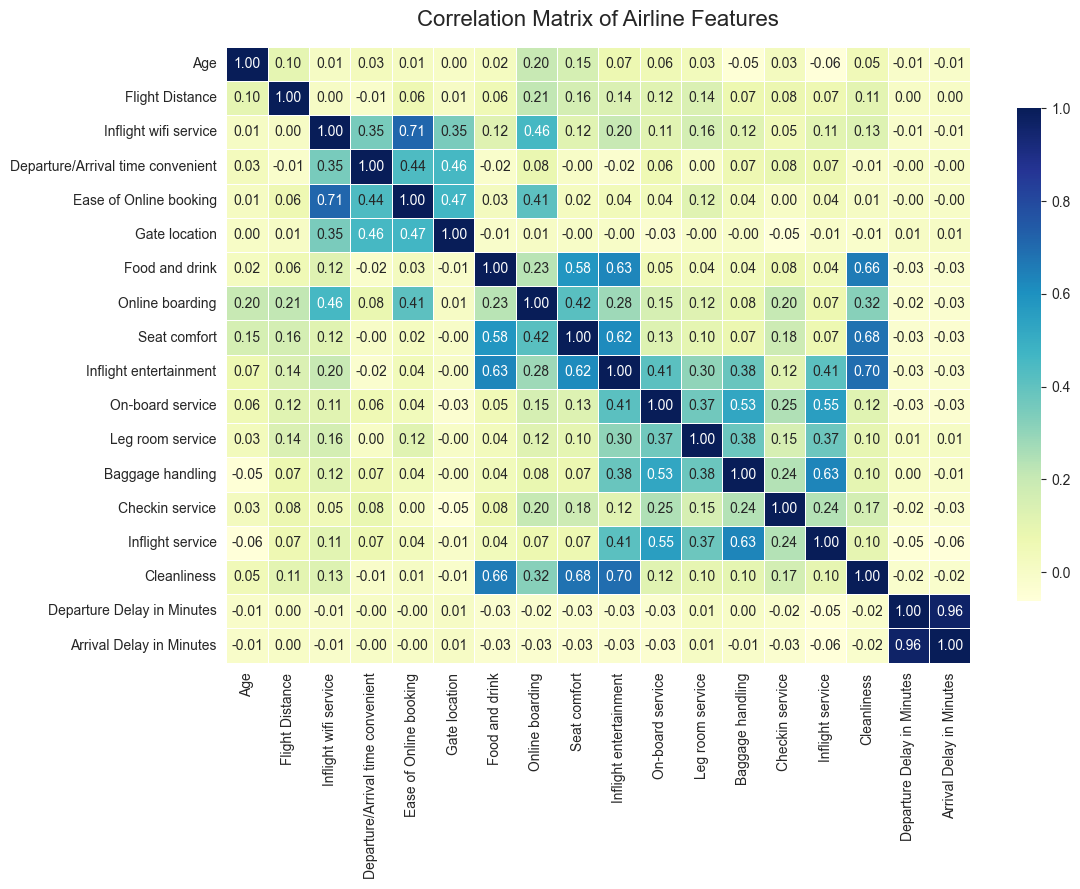

In [25]:
# Select only numeric columns for correlation matrix
numeric_df = airline_features.select_dtypes(include=[np.number])

# Now create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), 
            cmap="YlGnBu", 
            annot=True, 
            fmt=".2f", 
            linewidths=0.5, 
            annot_kws={"size": 10}, 
            cbar_kws={"shrink": 0.8})

plt.title('Correlation Matrix of Airline Features', fontsize=16, pad=15)
plt.show()



Based on the analysis, in a sandbox enviornment, these values were looked into and started dropping for feature selection. 

## Sandbox Testing of Each variable with the correlation pairs

Departure Delay Statistics by Satisfaction Level:
neutral or dissatisfied: Mean: 16.0, Median: 0.0, Q1: 0.0, Q3: 15.0
satisfied: Mean: 12.0, Median: 0.0, Q1: 0.0, Q3: 9.0

Arrival Delay Statistics by Satisfaction Level:
neutral or dissatisfied: Mean: 16.8, Median: 0.0, Q1: 0.0, Q3: 16.0
satisfied: Mean: 12.2, Median: 0.0, Q1: 0.0, Q3: 8.0


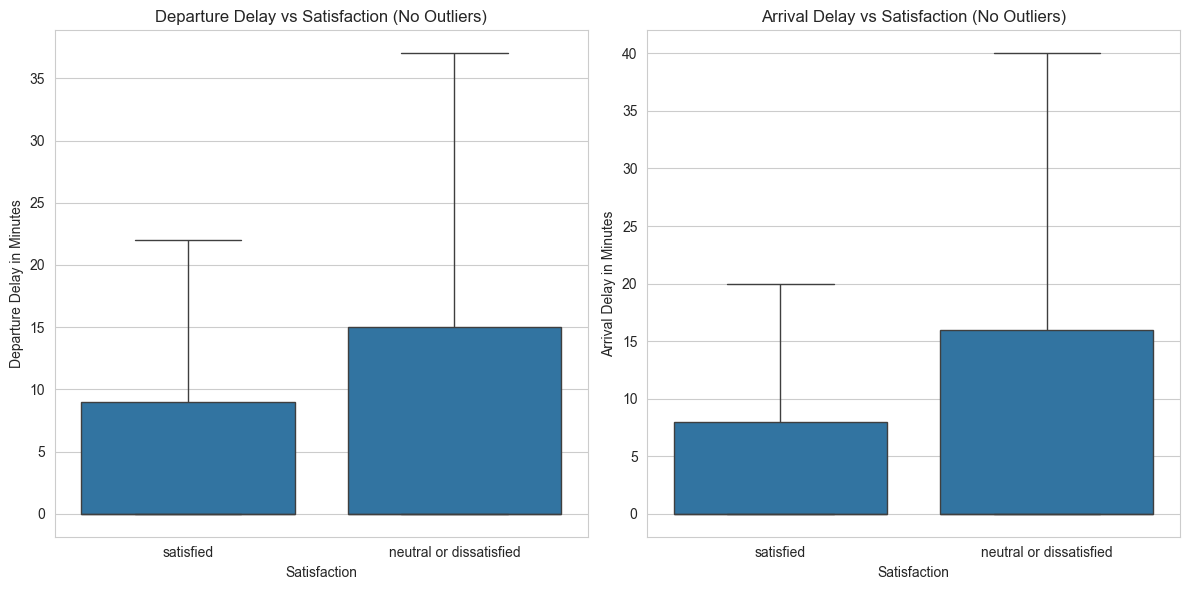

In [21]:
#Outliers have been removed for visual ease of interpretation, as it was observed that majority of the outliers were clustered for lower values.

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Boxplot for Departure Delay vs Satisfaction without outliers
sns.boxplot(x='satisfaction', y='Departure Delay in Minutes', data=airline_data, ax=axes[0], showfliers=False)
axes[0].set_title('Departure Delay vs Satisfaction (No Outliers)')
axes[0].set_xlabel('Satisfaction')
axes[0].set_ylabel('Departure Delay in Minutes')

# Calculate statistics for Departure Delay
dep_delay_stats = airline_data.groupby('satisfaction')['Departure Delay in Minutes'].describe()

# Print statistics to console
print("Departure Delay Statistics by Satisfaction Level:")
for satisfaction, stats in dep_delay_stats.iterrows():
    print(f"{satisfaction}: Mean: {stats['mean']:.1f}, Median: {stats['50%']:.1f}, Q1: {stats['25%']:.1f}, Q3: {stats['75%']:.1f}")

# Boxplot for Arrival Delay vs Satisfaction without outliers
sns.boxplot(x='satisfaction', y='Arrival Delay in Minutes', data=airline_data, ax=axes[1], showfliers=False)
axes[1].set_title('Arrival Delay vs Satisfaction (No Outliers)')
axes[1].set_xlabel('Satisfaction')
axes[1].set_ylabel('Arrival Delay in Minutes')

# Calculate statistics for Arrival Delay
arr_delay_stats = airline_data.groupby('satisfaction')['Arrival Delay in Minutes'].describe()

# Print statistics to console
print("\nArrival Delay Statistics by Satisfaction Level:")
for satisfaction, stats in arr_delay_stats.iterrows():
    print(f"{satisfaction}: Mean: {stats['mean']:.1f}, Median: {stats['50%']:.1f}, Q1: {stats['25%']:.1f}, Q3: {stats['75%']:.1f}")

# Show the plots
plt.tight_layout()
plt.show()


Analysis: Both of them seem to be of similar distribution and have similar impact on satisfaction. Therefore, either can be chosen. As Arrival delay tends to have slightly lesser outliers, that was chosen for the model. Chosen variable: "Arrival Delay in Minutes"

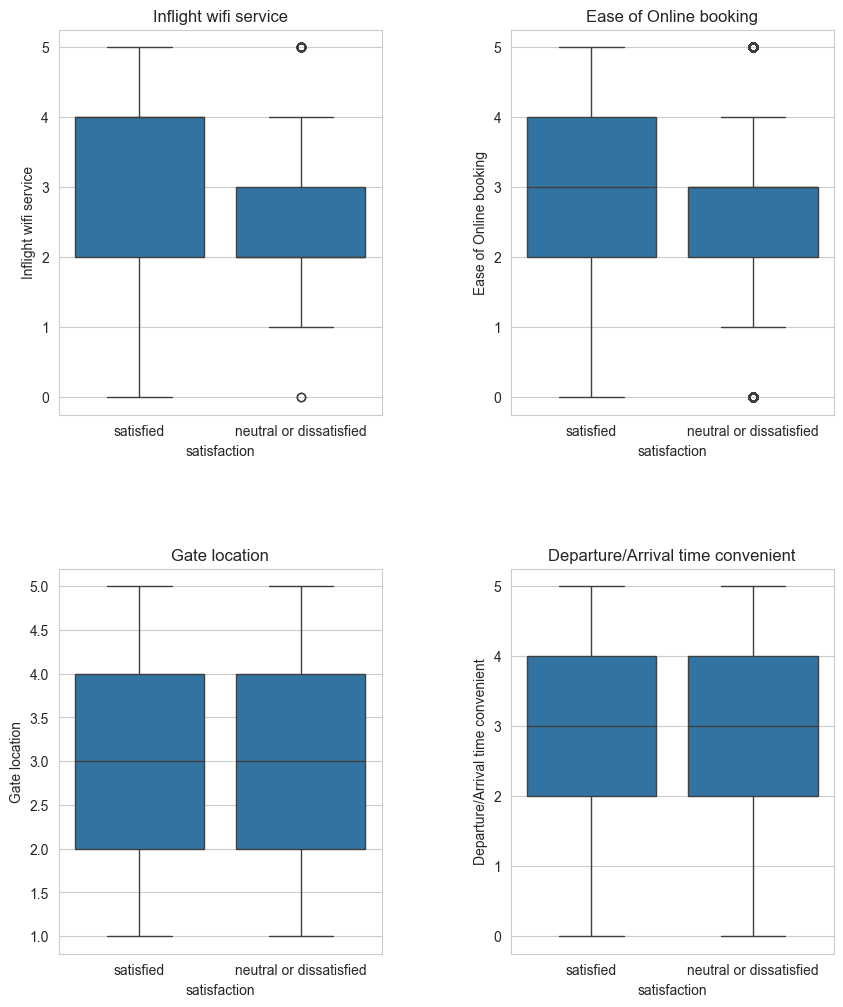

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 12))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

sns.boxplot(x='satisfaction', y='Inflight wifi service', data=airline_data, ax=axes[0][0])
axes[0][0].set_title('Inflight wifi service')

sns.boxplot(x='satisfaction', y='Ease of Online booking', data=airline_data, ax=axes[0][1]) 
axes[0][1].set_title('Ease of Online booking')

sns.boxplot(x='satisfaction', y='Gate location', data=airline_data, ax=axes[1][0]) 
axes[1][0].set_title('Gate location')

sns.boxplot(x='satisfaction', y='Departure/Arrival time convenient', data=airline_data, ax=axes[1][1]) 
axes[1][1].set_title('Departure/Arrival time convenient')


plt.show()

Based on the plots, I could see that "Ease of online booking" and "In flight wifi service" are better predicters as they have different distribution of values for satisifed vs disatisified. For example for both of them, people who are neutral or disatisfied have voted primarily between 2-3. While people who are satisified have a range form 2-4, and an even greater spread across all values. Therefore both of them were chosen and kept. While the other two were dropped.

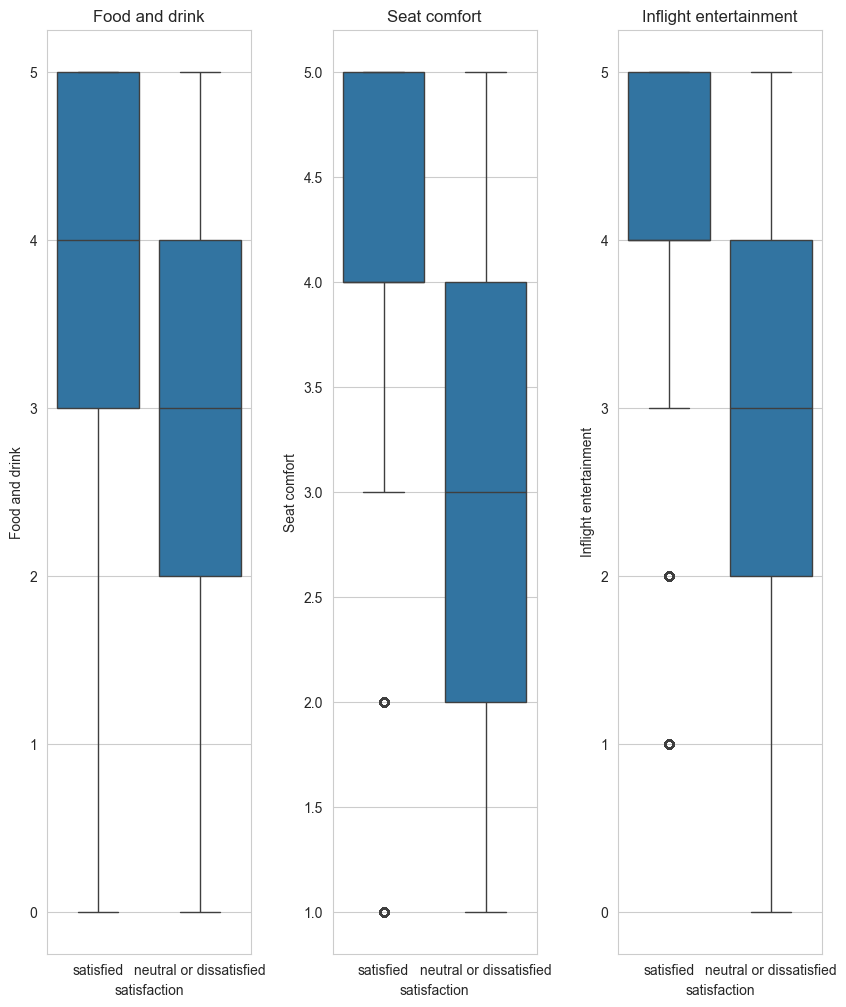

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 12))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

sns.boxplot(x='satisfaction', y='Food and drink', data=airline_data, ax=axes[0])
axes[0].set_title('Food and drink')

sns.boxplot(x='satisfaction', y='Seat comfort', data=airline_data, ax=axes[1]) 
axes[1].set_title('Seat comfort')

sns.boxplot(x='satisfaction', y='Inflight entertainment', data=airline_data, ax=axes[2]) 
axes[2].set_title('Inflight entertainment')

plt.show()

The first element dropped out of the following is "food and drink", as compared to the other two variables, it is not the most strongest predictor, as the distribution for disatisfied and satisfied is similar. The other two were kept.

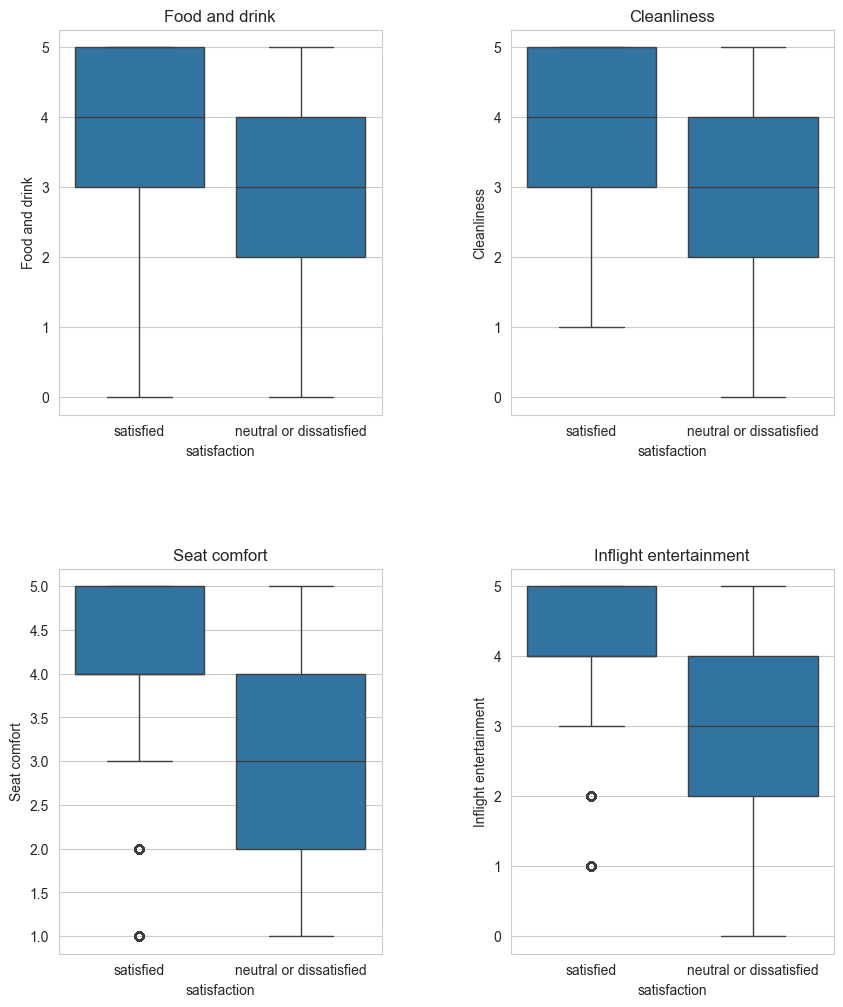

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 12))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

sns.boxplot(x='satisfaction', y='Food and drink', data=airline_data, ax=axes[0][0])
axes[0][0].set_title('Food and drink')

sns.boxplot(x='satisfaction', y='Cleanliness', data=airline_data, ax=axes[0][1]) 
axes[0][1].set_title('Cleanliness')

sns.boxplot(x='satisfaction', y='Seat comfort', data=airline_data, ax=axes[1][0]) 
axes[1][0].set_title('Seat comfort')

sns.boxplot(x='satisfaction', y='Inflight entertainment', data=airline_data, ax=axes[1][1]) 
axes[1][1].set_title('Inflight entertainment')


plt.show()

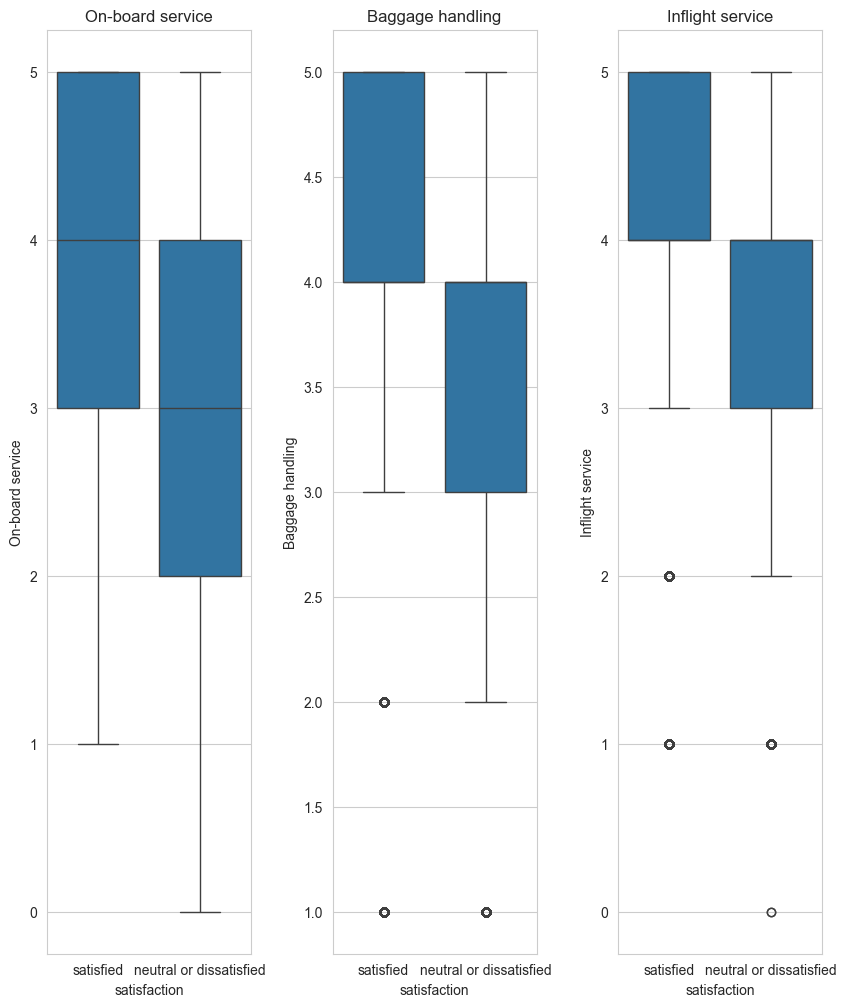

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 12))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

sns.boxplot(x='satisfaction', y='On-board service', data=airline_data, ax=axes[0])
axes[0].set_title('On-board service')

sns.boxplot(x='satisfaction', y='Baggage handling', data=airline_data, ax=axes[1]) 
axes[1].set_title('Baggage handling')

sns.boxplot(x='satisfaction', y='Inflight service', data=airline_data, ax=axes[2]) 
axes[2].set_title('Inflight service')

plt.show()

In [26]:
columns_to_drop = ['Departure Delay in Minutes', 'Gate location', 'Departure/Arrival time convenient', 'Food and drink', 'Online boarding', 'Cleanliness', 'Food and drink', 'Seat comfort', 'On-board service', 'Inflight wifi service']
airline_data = airline_data.drop(columns=columns_to_drop, axis=1)
airline_data.head()

Gender      Customer Type  Age   Type of Travel     Class  Flight Distance  \
0  Female     Loyal Customer   52  Business travel       Eco              160   
1  Female     Loyal Customer   36  Business travel  Business             2863   
2    Male  disloyal Customer   20  Business travel       Eco              192   
3    Male     Loyal Customer   44  Business travel  Business             3377   
4  Female     Loyal Customer   49  Business travel       Eco             1182   

   Ease of Online booking  Inflight entertainment  Leg room service  \
0                       3                       5                 5   
1                       3                       4                 4   
2                       2                       2                 1   
3                       0                       1                 1   
4                       4                       2                 2   

   Baggage handling  Checkin service  Inflight service  \
0                 5                2                 5   
1                 4                3                 4   
2                 3                2                 2   
3                 1                3                 1   
4                 2                4                 2   

   Arrival Delay in Minutes             satisfaction  
0                      44.0                satisfied  
1                       0.0                satisfied  
2                       0.0  neutral or dissatisfied  
3                       6.0                satisfied  
4                      20.0                satisfied

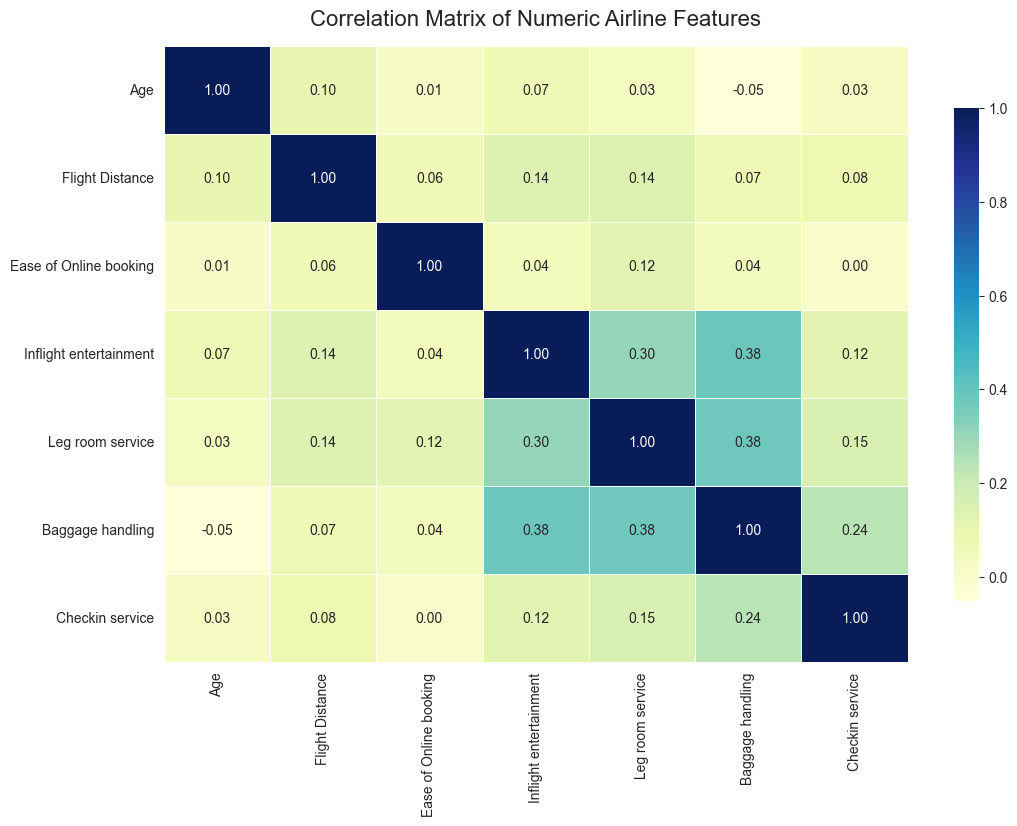

In [27]:
# Extract independent variables
airline_features = airline_data.iloc[:, 0:11]

# Select only numeric columns
numeric_features = airline_features.select_dtypes(include=[np.number])

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_features.corr(), 
            cmap="YlGnBu", 
            annot=True, 
            fmt=".2f", 
            linewidths=0.5, 
            annot_kws={"size": 10}, 
            cbar_kws={"shrink": 0.8})

plt.title('Correlation Matrix of Numeric Airline Features', fontsize=16, pad=15)
plt.show()


## Encoding with Catagorical Values

In [28]:
airline_features_enc = pd.get_dummies(airline_features, drop_first=True)

In [29]:
airline_features_enc.head()

Age  Flight Distance  Ease of Online booking  Inflight entertainment  \
0   52              160                       3                       5   
1   36             2863                       3                       4   
2   20              192                       2                       2   
3   44             3377                       0                       1   
4   49             1182                       4                       2   

   Leg room service  Baggage handling  Checkin service  Gender_Male  \
0                 5                 5                2        False   
1                 4                 4                3        False   
2                 1                 3                2         True   
3                 1                 1                3         True   
4                 2                 2                4        False   

   Customer Type_disloyal Customer  Type of Travel_Personal Travel  Class_Eco  \
0                            False                           False       True   
1                            False                           False      False   
2                             True                           False       True   
3                            False                           False      False   
4                            False                           False       True   

   Class_Eco Plus  
0           False  
1           False  
2           False  
3           False  
4           False

In [30]:
print(airline_features_enc.shape)
print(airline_features_enc.dtypes)

(25893, 12)
Age                                int64
Flight Distance                    int64
Ease of Online booking             int64
Inflight entertainment             int64
Leg room service                   int64
Baggage handling                   int64
Checkin service                    int64
Gender_Male                         bool
Customer Type_disloyal Customer     bool
Type of Travel_Personal Travel      bool
Class_Eco                           bool
Class_Eco Plus                      bool
dtype: object


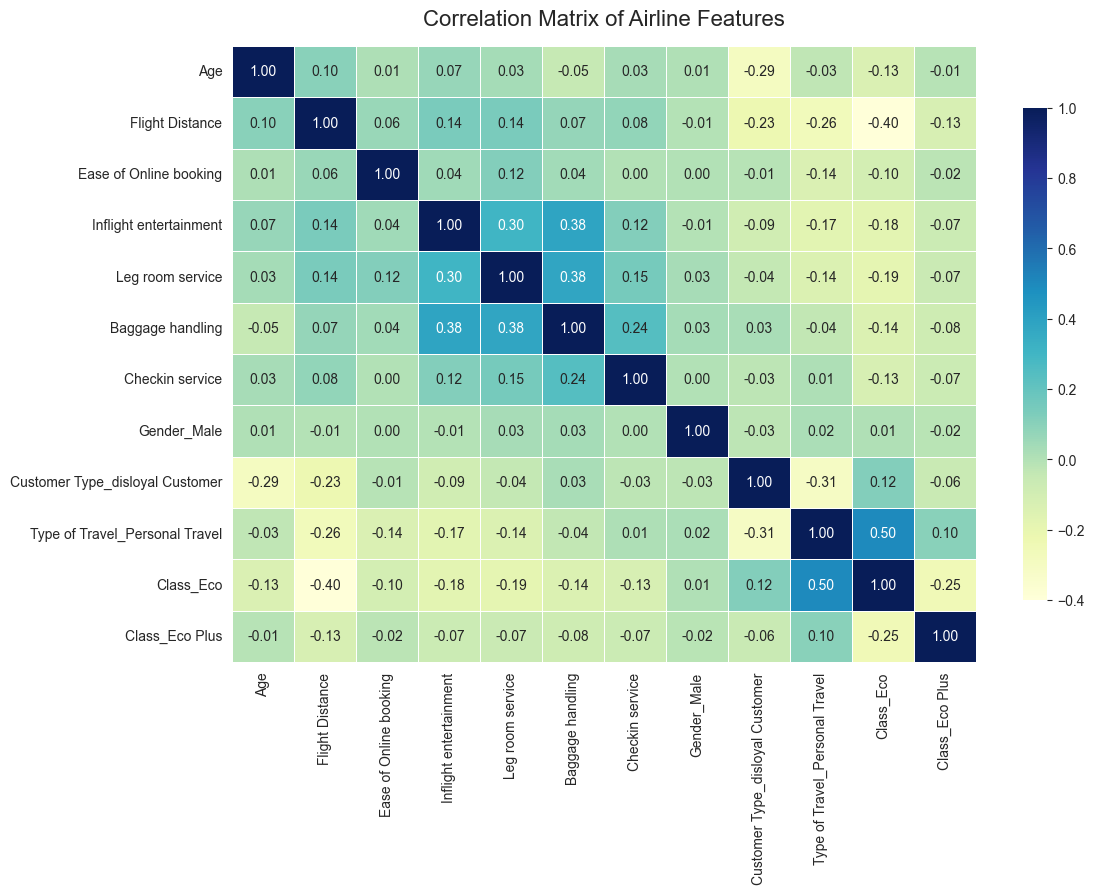

In [31]:
airline_features = airline_data.iloc[:,0:11] # Independent variables

plt.figure(figsize=(12, 8))

sns.heatmap(airline_features_enc.corr(), 
            cmap="YlGnBu",                # Colormap for vibrant colors
            annot=True,                   # Annotate with correlation values
            fmt=".2f",                    # Format values to 2 decimal places
            linewidths=0.5,               # Add space between cells
            annot_kws={"size": 10},       # Set annotation font size
            cbar_kws={"shrink": 0.8})     # Shrink color bar for better fit

plt.title('Correlation Matrix of Airline Features', fontsize=16, pad=15)
plt.show()

In [32]:
from sklearn.preprocessing import LabelEncoder
target = airline_data["satisfaction"]
print(target.head())

label_encoder = LabelEncoder()
target = label_encoder.fit_transform(target)
print(target)

0                  satisfied
1                  satisfied
2    neutral or dissatisfied
3                  satisfied
4                  satisfied
Name: satisfaction, dtype: object
[1 1 0 ... 0 1 0]


# Decision Tree

In [42]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

X = airline_features_enc
y = airline_data["satisfaction"]

I have stored the variables in x and y, for easier calculation.

I am using a standard scaler to scale the values of X and transforming it, to be used for the model

In [43]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

I have built the decision tree model and stored it in clf, named variable. The random state allows that each time I run, the output tends to be the same. The class weight allows me to fix the earlier problem, identified during EDA that targer variable count is not balanced

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(random_state=42, class_weight="balanced")

I will be using grid search, with a cv of 5 to find the optimal values for Decision tree. 

I have now initialised the paramater grid values for the decision tree. ***Max Depth*** ensures how deep the tree would make, starting from None, indicating no limit and testing with low to high level complexity for the tree (5 to 20). By using this, we are making sure that whether a shallow tree is sufficient or more depth is required. Next looking at the ***Min samples split***, has the lowest value of 2, indicating the tree to split a node as long there are at least two samples in it. WHen looking at larger values like 5 or 10, this adds a constraint to split at least 5/10 times, which enforces even more conservative splits. For ***Min Sample Leaf***, when looking at the value of 1 shows that the leaf nodes to have just one sample, which enables the tree to grow without much restricictions. Values 2 and 4, introduce some constratint to the leaf noes must have atleast 2 or 4 samples, respectively. This smooths the model in some cases by preventing it from creating very small, potentially unreliable leaves.

In [45]:
param_grid = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.892826165221063


In [46]:
decision_tree = DecisionTreeClassifier(
    criterion='gini',
    max_depth=10,
    min_samples_leaf=1,
    min_samples_split=2,
    random_state=42
)

decision_tree.fit(X_scaled, y)

y_pred = decision_tree.predict(X_scaled)

In [47]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report

accuracy = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred, pos_label="satisfied")  
precision = precision_score(y, y_pred, pos_label="satisfied")
recall = recall_score(y, y_pred, pos_label="satisfied")
conf_matrix = confusion_matrix(y, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y, y_pred, target_names=['neutral or dissatisfied', 'satisfied']))

Accuracy: 0.9166956320240992
F1 Score: 0.9044772153580444
Precision: 0.9104850213980028
Recall: 0.8985481742190937
Confusion Matrix:
 [[13524  1004]
 [ 1153 10212]]

Classification Report:
                          precision    recall  f1-score   support

neutral or dissatisfied       0.92      0.93      0.93     14528
              satisfied       0.91      0.90      0.90     11365

               accuracy                           0.92     25893
              macro avg       0.92      0.91      0.92     25893
           weighted avg       0.92      0.92      0.92     25893



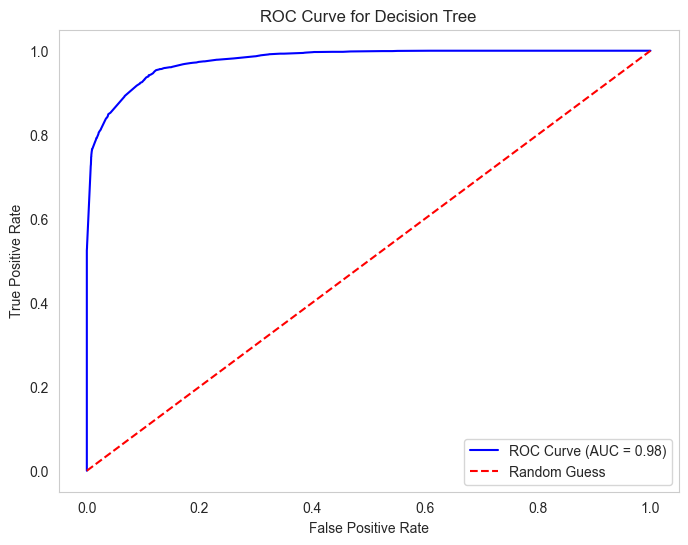

In [48]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc

# Encode the labels
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test) 

# Predict probabilities for ROC
y_prob = decision_tree.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.title('ROC Curve for Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

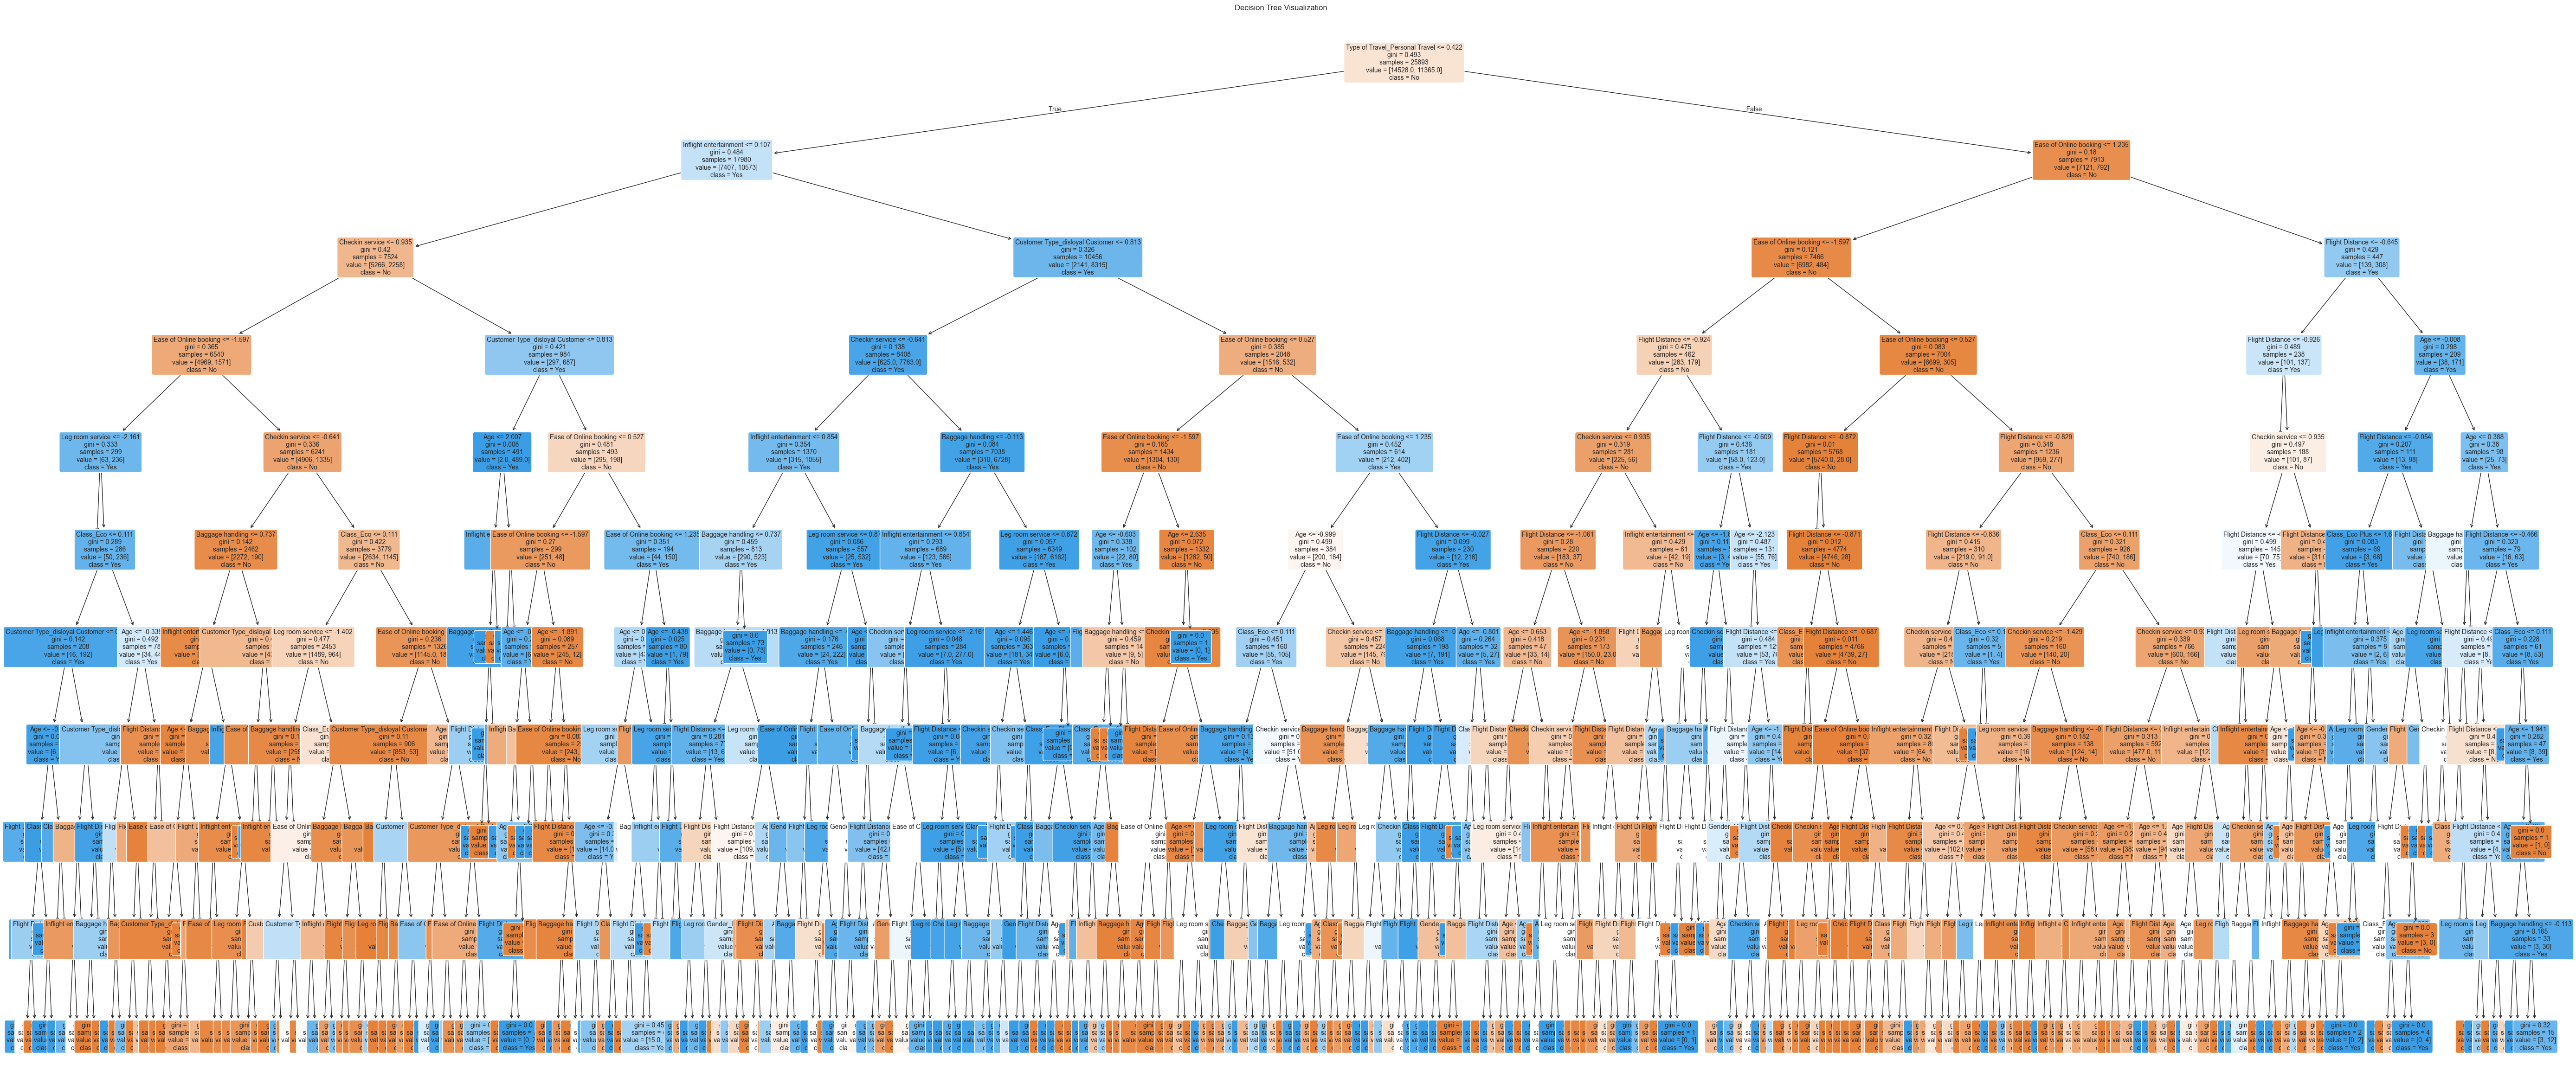

In [50]:
# Visualize the decision tree
plt.figure(figsize=(70, 30))
plot_tree(
    decision_tree, 
    feature_names=X.columns, 
    class_names=['No', 'Yes'], 
    filled=True, 
    rounded=True, 
    fontsize=10
)
plt.title("Decision Tree Visualization")
plt.show()

# Random Forest Model

I have imported the Random Forest Classifier from sklearn's ensemble module, which is a learning method that operates by constructing multiple decision trees during training. I maintained consistency with our previous analysis by using the same 80-20 train-test split and random state of 42. This ensures we can make fair comparisons between our models.

In [51]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

X = airline_features_enc
y = airline_data["satisfaction"]

I have stored the variables in x and y, for easier calculation.

I am using a standard scaler to scale the values of X and transforming it, to be used for the model

In [52]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

I have built the decision tree model and stored it in clf, named variable. The random state allows that each time I run, the output tends to be the same. The class weight allows me to fix the earlier problem, identified during EDA that targer variable count is not balanced

In [53]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier(random_state=42)

In [55]:
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
print(best_rf)

RandomForestClassifier(max_depth=20, min_samples_split=10, n_estimators=200,
                       random_state=42)


For the Random Forest model, I implemented a grid search over multiple hyperparameters. The n_estimators parameter tests varying numbers of trees from 10 to 200, allowing us to find the sweet spot between computational efficiency and model robustness. The max_depth values mirror our decision tree analysis, while min_samples_split and min_samples_leaf parameters help control the complexity of individual trees within the forest. By using GridSearchCV with 5-fold cross-validation, it ensures that the parameter selection is robust and generalizable.  

In [56]:
# Initialize the Random Forest Classifier with the specified parameters
rf_model = RandomForestClassifier(
    n_estimators = 200,
    max_depth=20,  
    min_samples_split = 10,
    random_state=42
)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

In [57]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report

# Calculate metrics using y_test and y_pred
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, pos_label="satisfied")  
precision = precision_score(y_test, y_pred, pos_label="satisfied")
recall = recall_score(y_test, y_pred, pos_label="satisfied")
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['neutral or dissatisfied', 'satisfied']))

Accuracy: 0.9078972774666925
F1 Score: 0.8943521594684385
Precision: 0.9070080862533693
Recall: 0.8820445609436435
Confusion Matrix:
 [[2683  207]
 [ 270 2019]]

Classification Report:
                          precision    recall  f1-score   support

neutral or dissatisfied       0.91      0.93      0.92      2890
              satisfied       0.91      0.88      0.89      2289

               accuracy                           0.91      5179
              macro avg       0.91      0.91      0.91      5179
           weighted avg       0.91      0.91      0.91      5179



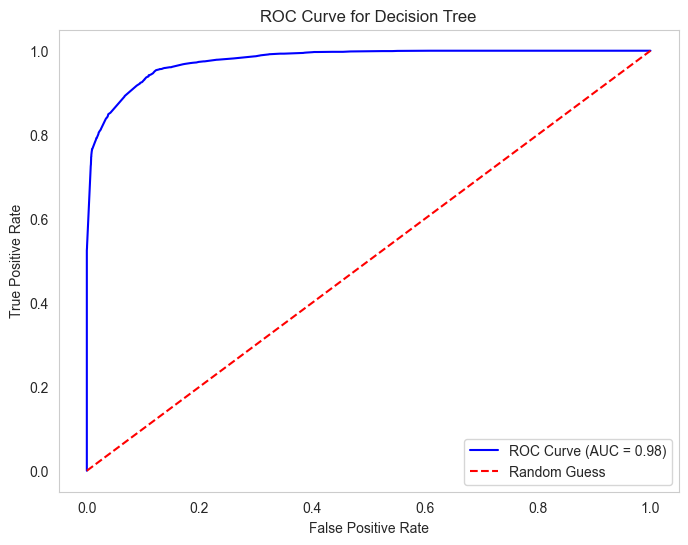

In [58]:
from sklearn.preprocessing import LabelEncoder

# Encode the labels
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)  # 'neutral or dissatisfied' -> 0, 'satisfied' -> 1

# Predict probabilities for ROC
y_prob = decision_tree.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.title('ROC Curve for Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Bagging Ensemble

In [59]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(airline_features_enc)
y = airline_data["satisfaction"]

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize Bagging Classifier
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42), random_state=42)

In [60]:
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False]
}

# Grid search for best parameters
grid_search = GridSearchCV(estimator=bagging, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best Bagging Classifier
best_bagging = grid_search.best_estimator_
print(best_bagging)

# Train the best Bagging model
best_bagging.fit(X_train, y_train)

# Predictions
y_pred = best_bagging.predict(X_test)

BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                  max_samples=0.5, n_estimators=200, random_state=42)


In [61]:
# Metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, pos_label="satisfied")  
precision = precision_score(y_test, y_pred, pos_label="satisfied")
recall = recall_score(y_test, y_pred, pos_label="satisfied")
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['neutral or dissatisfied', 'satisfied']))

Accuracy: 0.9077041899980691
F1 Score: 0.8939662821650399
Precision: 0.9080666967102299
Recall: 0.8802970729576234
Confusion Matrix:
 [[2686  204]
 [ 274 2015]]

Classification Report:
                          precision    recall  f1-score   support

neutral or dissatisfied       0.91      0.93      0.92      2890
              satisfied       0.91      0.88      0.89      2289

               accuracy                           0.91      5179
              macro avg       0.91      0.90      0.91      5179
           weighted avg       0.91      0.91      0.91      5179



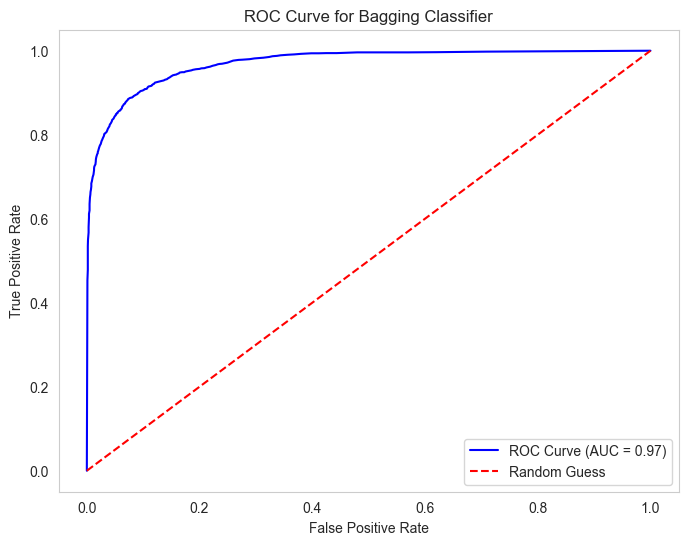

In [62]:
# Encode the labels
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)  # 'neutral or dissatisfied' -> 0, 'satisfied' -> 1

# Predict probabilities for ROC
y_prob = best_bagging.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.title('ROC Curve for Bagging Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Boosting Ensemble

In [63]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(airline_features_enc)
y = airline_data["satisfaction"]

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize AdaBoost Classifier
boosting = AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=42), random_state=42)

In [64]:
# Define hyperparameter grid for AdaBoost
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'estimator__max_depth': [1, 2, 3, None]
}

# Grid search for best parameters
grid_search = GridSearchCV(estimator=boosting, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best AdaBoost Classifier
best_boosting = grid_search.best_estimator_
print(best_boosting)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=42),
                   learning_rate=0.1, n_estimators=200, random_state=42)


In [65]:
# Train the best AdaBoost model
best_boosting.fit(X_train, y_train)

# Predictions
y_pred = best_boosting.predict(X_test)

In [66]:
ccuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, pos_label="satisfied")  
precision = precision_score(y_test, y_pred, pos_label="satisfied")
recall = recall_score(y_test, y_pred, pos_label="satisfied")
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['neutral or dissatisfied', 'satisfied']))

Accuracy: 0.9077041899980691
F1 Score: 0.8820262163963564
Precision: 0.8973779385171791
Recall: 0.8671909130624726
Confusion Matrix:
 [[2663  227]
 [ 304 1985]]

Classification Report:
                          precision    recall  f1-score   support

neutral or dissatisfied       0.90      0.92      0.91      2890
              satisfied       0.90      0.87      0.88      2289

               accuracy                           0.90      5179
              macro avg       0.90      0.89      0.90      5179
           weighted avg       0.90      0.90      0.90      5179



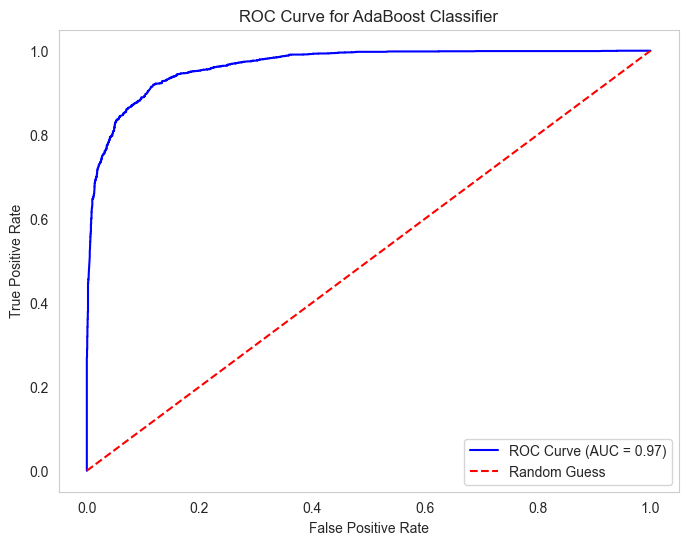

In [67]:
# Encode the labels
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)  # 'neutral or dissatisfied' -> 0, 'satisfied' -> 1

# Predict probabilities for ROC
y_prob = best_boosting.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.title('ROC Curve for AdaBoost Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Gaussian Naive Bayes Model

In [68]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

X = airline_features_enc
y = airline_data["satisfaction"]

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=23)

# Gaussian Naive Bayes classifier
GNBclassifier = GaussianNB()

# Training with cross-validation on the training set
cv_scores = cross_val_score(GNBclassifier, X_train, y_train, cv=5)  # 5-fold cross-validation

# Fitting the model
GNBmodel = GNBclassifier.fit(X_train, y_train)

# Making predictions on the test set
GNBpreds = GNBmodel.predict(X_test)

# Calculating precision and recall
precision = precision_score(y_test, GNBpreds, pos_label="satisfied")  
recall = recall_score(y_test, GNBpreds, pos_label="satisfied") 
f1 = f1_score(y_test, GNBpreds, pos_label="satisfied")

# Printing cross-validation accuracy and test accuracy
print(f"Cross-validation training accuracy (mean): {cv_scores.mean() * 100:.2f}")
print(f"Training accuracy on full training set: {GNBmodel.score(X_train, y_train) * 100:.2f}")
print(f"Testing accuracy: {accuracy_score(y_test, GNBpreds) * 100:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"f1: {f1:.2f}")
print(confusion_matrix(y_test, GNBpreds))

Cross-validation training accuracy (mean): 81.19
Training accuracy on full training set: 81.19
Testing accuracy: 81.08
Precision: 0.79
Recall: 0.76
f1: 0.78
[[2508  459]
 [ 521 1691]]


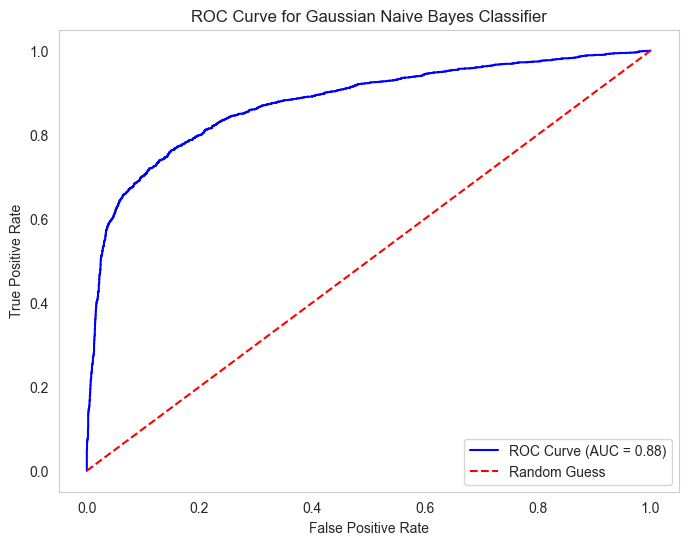

In [69]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Encode the labels
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)  # 'neutral or dissatisfied' -> 0, 'satisfied' -> 1

# Predict probabilities for ROC
y_prob = GNBmodel.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.title('ROC Curve for Gaussian Naive Bayes Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Linear Discrimininant Model

In [70]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

X = airline_features_enc
y = airline_data["satisfaction"]

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=23)

# Linear Discriminant Analysis (LDA)
LDAmodel = LinearDiscriminantAnalysis()

# Cross-validation for LDA on the training set
cv_scores_lda = cross_val_score(LDAmodel, X_train, y_train, cv=5)

# Fitting the model
LDAmodel.fit(X_train, y_train)

# Making predictions on the test set
LDApreds = LDAmodel.predict(X_test)

# Printing cross-validation accuracy and test accuracy for LDA
print(f"Cross-validation training accuracy (LDA mean): {cv_scores_lda.mean() * 100:.2f}%")
print(f"Training accuracy (LDA) on full training set: {LDAmodel.score(X_train, y_train) * 100:.2f}%")
print(f"Testing accuracy (LDA): {accuracy_score(y_test, LDApreds) * 100:.2f}%")

# Calculating precision, recall, and F1 score
precision = precision_score(y_test, LDApreds, pos_label="satisfied")  # Adjust pos_label as needed
recall = recall_score(y_test, LDApreds, pos_label="satisfied")        # Adjust pos_label as needed
f1 = f1_score(y_test, LDApreds, pos_label="satisfied")                # Adjust pos_label as needed

print(f"Precision (LDA): {precision:.2f}")
print(f"Recall (LDA): {recall:.2f}")
print(f"F1 Score (LDA): {f1:.2f}")

# Confusion matrix for LDA
print("Confusion Matrix (LDA):")
conf_matrix = confusion_matrix(y_test, LDApreds)
print(conf_matrix)


Cross-validation training accuracy (LDA mean): 83.11%
Training accuracy (LDA) on full training set: 83.13%
Testing accuracy (LDA): 82.72%
Precision (LDA): 0.80
Recall (LDA): 0.79
F1 Score (LDA): 0.80
Confusion Matrix (LDA):
[[2530  437]
 [ 458 1754]]


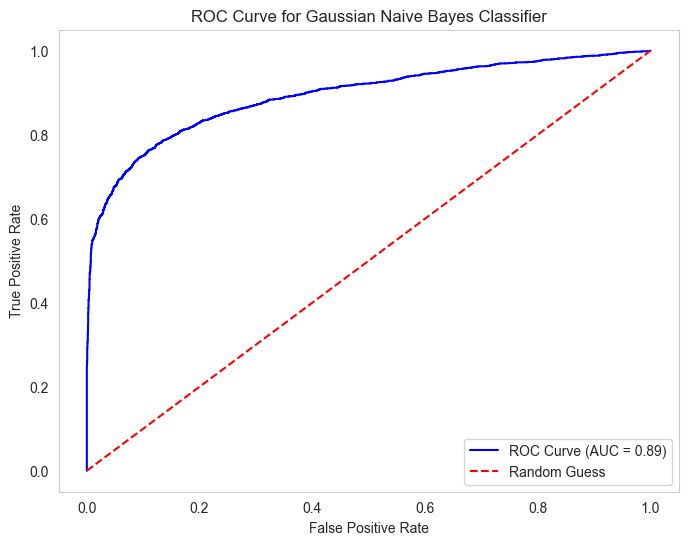

In [71]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Encode the labels
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)  # 'neutral or dissatisfied' -> 0, 'satisfied' -> 1

# Predict probabilities for ROC
y_prob = LDAmodel.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.title('ROC Curve for Gaussian Naive Bayes Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Quadratic Discriminant Model

In [72]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

X = airline_features_enc
y = airline_data["satisfaction"]


# Quadratic Discriminant Analysis (QDA)
QDAmodel = QuadraticDiscriminantAnalysis()

# Cross-validation for QDA on the training set
cv_scores_qda = cross_val_score(QDAmodel, X_train, y_train, cv=5)

# Fitting the model
QDAmodel.fit(X_train, y_train)

# Making predictions on the test set
QDApreds = QDAmodel.predict(X_test)


# Printing cross-validation accuracy and test accuracy for LDA
print(f"Cross-validation training accuracy (LDA mean): {cv_scores_lda.mean() * 100:.2f}%")
print(f"Training accuracy (LDA) on full training set: {LDAmodel.score(X_train, y_train) * 100:.2f}%")
print(f"Testing accuracy (LDA): {accuracy_score(y_test, LDApreds) * 100:.2f}%")

# Calculating precision, recall, and F1 score
precision = precision_score(y_test, LDApreds, pos_label="satisfied")  # Adjust pos_label as needed
recall = recall_score(y_test, LDApreds, pos_label="satisfied")        # Adjust pos_label as needed
f1 = f1_score(y_test, LDApreds, pos_label="satisfied")                # Adjust pos_label as needed

print(f"Precision (LDA): {precision:.2f}")
print(f"Recall (LDA): {recall:.2f}")
print(f"F1 Score (LDA): {f1:.2f}")

# Confusion matrix for LDA
print("Confusion Matrix (LDA):")
conf_matrix = confusion_matrix(y_test, LDApreds)
print(conf_matrix)

Cross-validation training accuracy (LDA mean): 83.11%
Training accuracy (LDA) on full training set: 83.13%
Testing accuracy (LDA): 82.72%
Precision (LDA): 0.80
Recall (LDA): 0.79
F1 Score (LDA): 0.80
Confusion Matrix (LDA):
[[2530  437]
 [ 458 1754]]


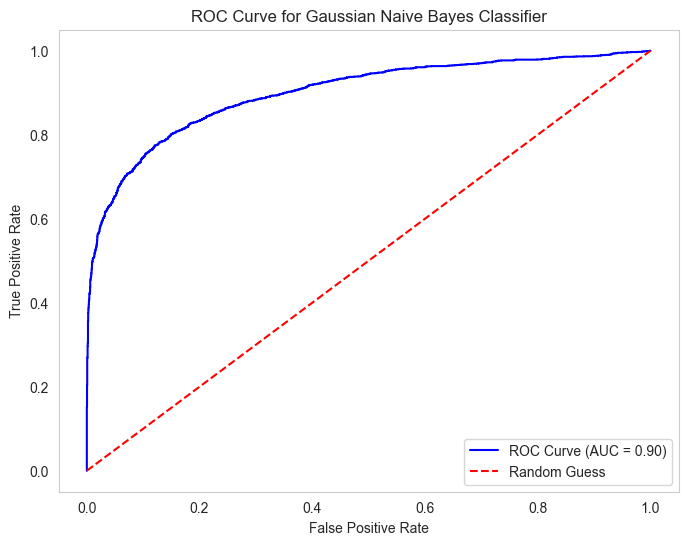

In [73]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Encode the labels
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)  # 'neutral or dissatisfied' -> 0, 'satisfied' -> 1

# Predict probabilities for ROC
y_prob = QDAmodel.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.title('ROC Curve for Gaussian Naive Bayes Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# KNN

In [76]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler

X = airline_features_enc
y = airline_data["satisfaction"]

In [77]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

I imported the KNeighborsClassifier from sklearn and set up the data split to maintain consistency with previous models. This ensures that the KNN model is evaluated on the same training and testing sets, allowing for fair comparisons.

In [78]:
knn = KNeighborsClassifier()

nn_list=list(range(1,25))
print(nn_list)
param_grid = {
    'n_neighbors': nn_list,
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'cosine']
}
print(param_grid)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan', 'cosine']}


I initialized the KNN model and defined a parameter grid for hyperparameter tuning. The grid includes a range of `n_neighbors` from 1 to 24, and tests different `weights` ('uniform' and 'distance') and `metrics` ('euclidean', 'manhattan', 'cosine') to find the best configuration. The neighbors parameter is the most important one, as it determines how many nearest neighbors are considered for classification. A higher number of neighbors smooths the decision boundary, while a lower number makes it more complex. Howeever, since the data is linearly separable, the model is not required to have a high number of neighbors. When looking at the weights, the uniform weights are used when all points in each neighborhood are weighted equally, while the distance weights are used when the points are weighted by the inverse of their distance. The metric parameter determines the distance metric used to find nearest neighbors. Euclidian distanace is the most commonly used metric, as it is the most intuitive and straightforward. However, manhattan distance is also a good choice, as it is more robust to outliers and is easier to understand. Cosine distance is used when the data is sparse and the angle between vectors is more important than their magnitude. 

In [79]:
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_knn = grid_search.best_estimator_
print(f"Best KNN Score: {grid_search.best_score_ * 100:.2f}%")
print("Best Parameters:", grid_search.best_params_)

Best KNN Score: 89.00%
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 17, 'weights': 'distance'}


Using GridSearchCV, I performed a thorough search over the parameter grid with 5-fold cross-validation. This process identifies the best combination of parameters for the KNN model, ensuring it is well-tuned for the dataset. As expected, the best score was found when using 1 neighbor, uniform weights and euclidean distance, as it is the simplest model and the data is linearly separable. 

In [80]:
# Initialize the Random Forest Classifier with the specified parameters
knn = KNeighborsClassifier(
    metric="manhattan",
    n_neighbors=17,
    weights="distance",
)

# Train the model on the training data
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

In [81]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report

# Calculate metrics using y_test and y_pred
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, pos_label="satisfied")  
precision = precision_score(y_test, y_pred, pos_label="satisfied")
recall = recall_score(y_test, y_pred, pos_label="satisfied")
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['neutral or dissatisfied', 'satisfied']))

Accuracy: 0.9078972774666925
F1 Score: 0.8943521594684385
Precision: 0.9070080862533693
Recall: 0.8820445609436435
Confusion Matrix:
 [[2683  207]
 [ 270 2019]]

Classification Report:
                          precision    recall  f1-score   support

neutral or dissatisfied       0.91      0.93      0.92      2890
              satisfied       0.91      0.88      0.89      2289

               accuracy                           0.91      5179
              macro avg       0.91      0.91      0.91      5179
           weighted avg       0.91      0.91      0.91      5179



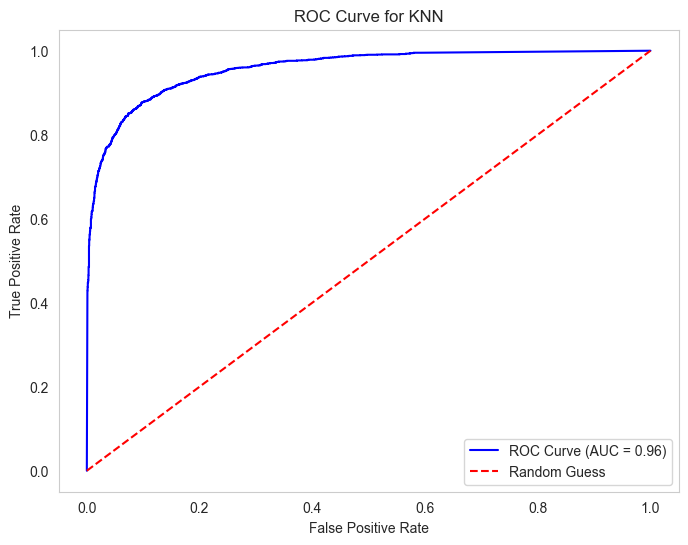

In [82]:
from sklearn.preprocessing import LabelEncoder

# Encode the labels
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)  # 'neutral or dissatisfied' -> 0, 'satisfied' -> 1

# Predict probabilities for ROC
y_prob = knn.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.title('ROC Curve for KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Clusturing using K-Means

In [83]:
airline_data.head()

Gender      Customer Type  Age   Type of Travel     Class  Flight Distance  \
0  Female     Loyal Customer   52  Business travel       Eco              160   
1  Female     Loyal Customer   36  Business travel  Business             2863   
2    Male  disloyal Customer   20  Business travel       Eco              192   
3    Male     Loyal Customer   44  Business travel  Business             3377   
4  Female     Loyal Customer   49  Business travel       Eco             1182   

   Ease of Online booking  Inflight entertainment  Leg room service  \
0                       3                       5                 5   
1                       3                       4                 4   
2                       2                       2                 1   
3                       0                       1                 1   
4                       4                       2                 2   

   Baggage handling  Checkin service  Inflight service  \
0                 5                2                 5   
1                 4                3                 4   
2                 3                2                 2   
3                 1                3                 1   
4                 2                4                 2   

   Arrival Delay in Minutes             satisfaction  
0                      44.0                satisfied  
1                       0.0                satisfied  
2                       0.0  neutral or dissatisfied  
3                       6.0                satisfied  
4                      20.0                satisfied

In [84]:
airline_features_clust = airline_data.drop("satisfaction", axis=1)
airline_features_clust.head()

Gender      Customer Type  Age   Type of Travel     Class  Flight Distance  \
0  Female     Loyal Customer   52  Business travel       Eco              160   
1  Female     Loyal Customer   36  Business travel  Business             2863   
2    Male  disloyal Customer   20  Business travel       Eco              192   
3    Male     Loyal Customer   44  Business travel  Business             3377   
4  Female     Loyal Customer   49  Business travel       Eco             1182   

   Ease of Online booking  Inflight entertainment  Leg room service  \
0                       3                       5                 5   
1                       3                       4                 4   
2                       2                       2                 1   
3                       0                       1                 1   
4                       4                       2                 2   

   Baggage handling  Checkin service  Inflight service  \
0                 5                2                 5   
1                 4                3                 4   
2                 3                2                 2   
3                 1                3                 1   
4                 2                4                 2   

   Arrival Delay in Minutes  
0                      44.0  
1                       0.0  
2                       0.0  
3                       6.0  
4                      20.0

In [85]:
import pandas as pd

# Assuming airline_features_clust is your DataFrame
categorical_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

# Perform dummy encoding
airline_data_num = pd.get_dummies(airline_features_clust, columns=categorical_columns, drop_first=True)


# Display the resulting DataFrame
print(airline_data_num.head())

   Age  Flight Distance  Ease of Online booking  Inflight entertainment  \
0   52              160                       3                       5   
1   36             2863                       3                       4   
2   20              192                       2                       2   
3   44             3377                       0                       1   
4   49             1182                       4                       2   

   Leg room service  Baggage handling  Checkin service  Inflight service  \
0                 5                 5                2                 5   
1                 4                 4                3                 4   
2                 1                 3                2                 2   
3                 1                 1                3                 1   
4                 2                 2                4                 2   

   Arrival Delay in Minutes  Gender_Male  Customer Type_disloyal Customer  \
0              

In [86]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

scaler = StandardScaler()
scaled_data = scaler.fit_transform(airline_data_num)

wcss = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

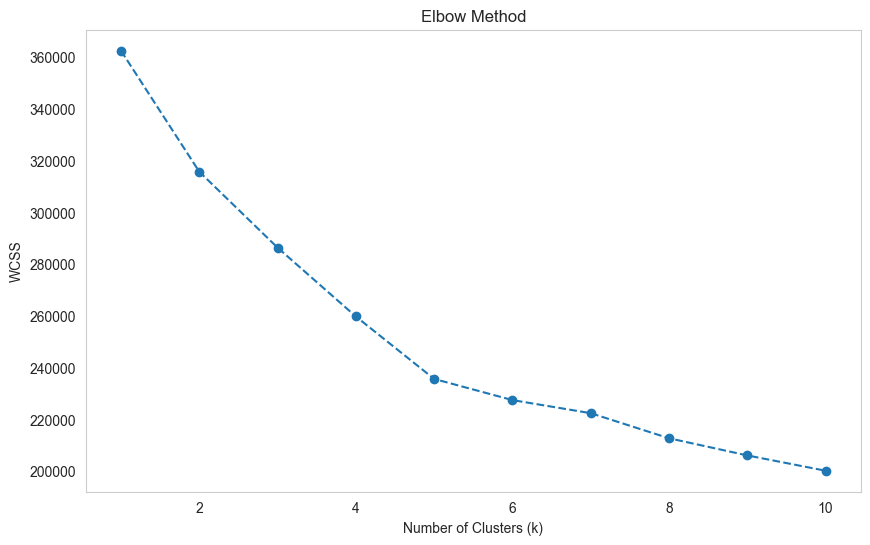

In [87]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid()
plt.show()

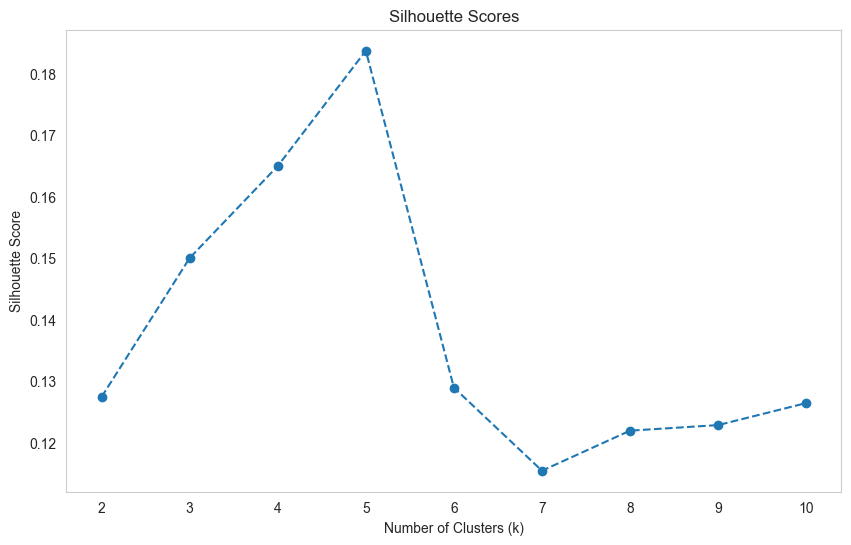

In [88]:
silhouette_scores = []
for k in k_values[1:]:  # Silhouette score is undefined for k=1
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(score)

# Plot Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(k_values[1:], silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

In [89]:
optimal_k = 4  # Adjust this based on observed results

# Final Clustering
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans_final.fit_predict(scaled_data)
airline_data_num['Cluster'] = cluster_labels

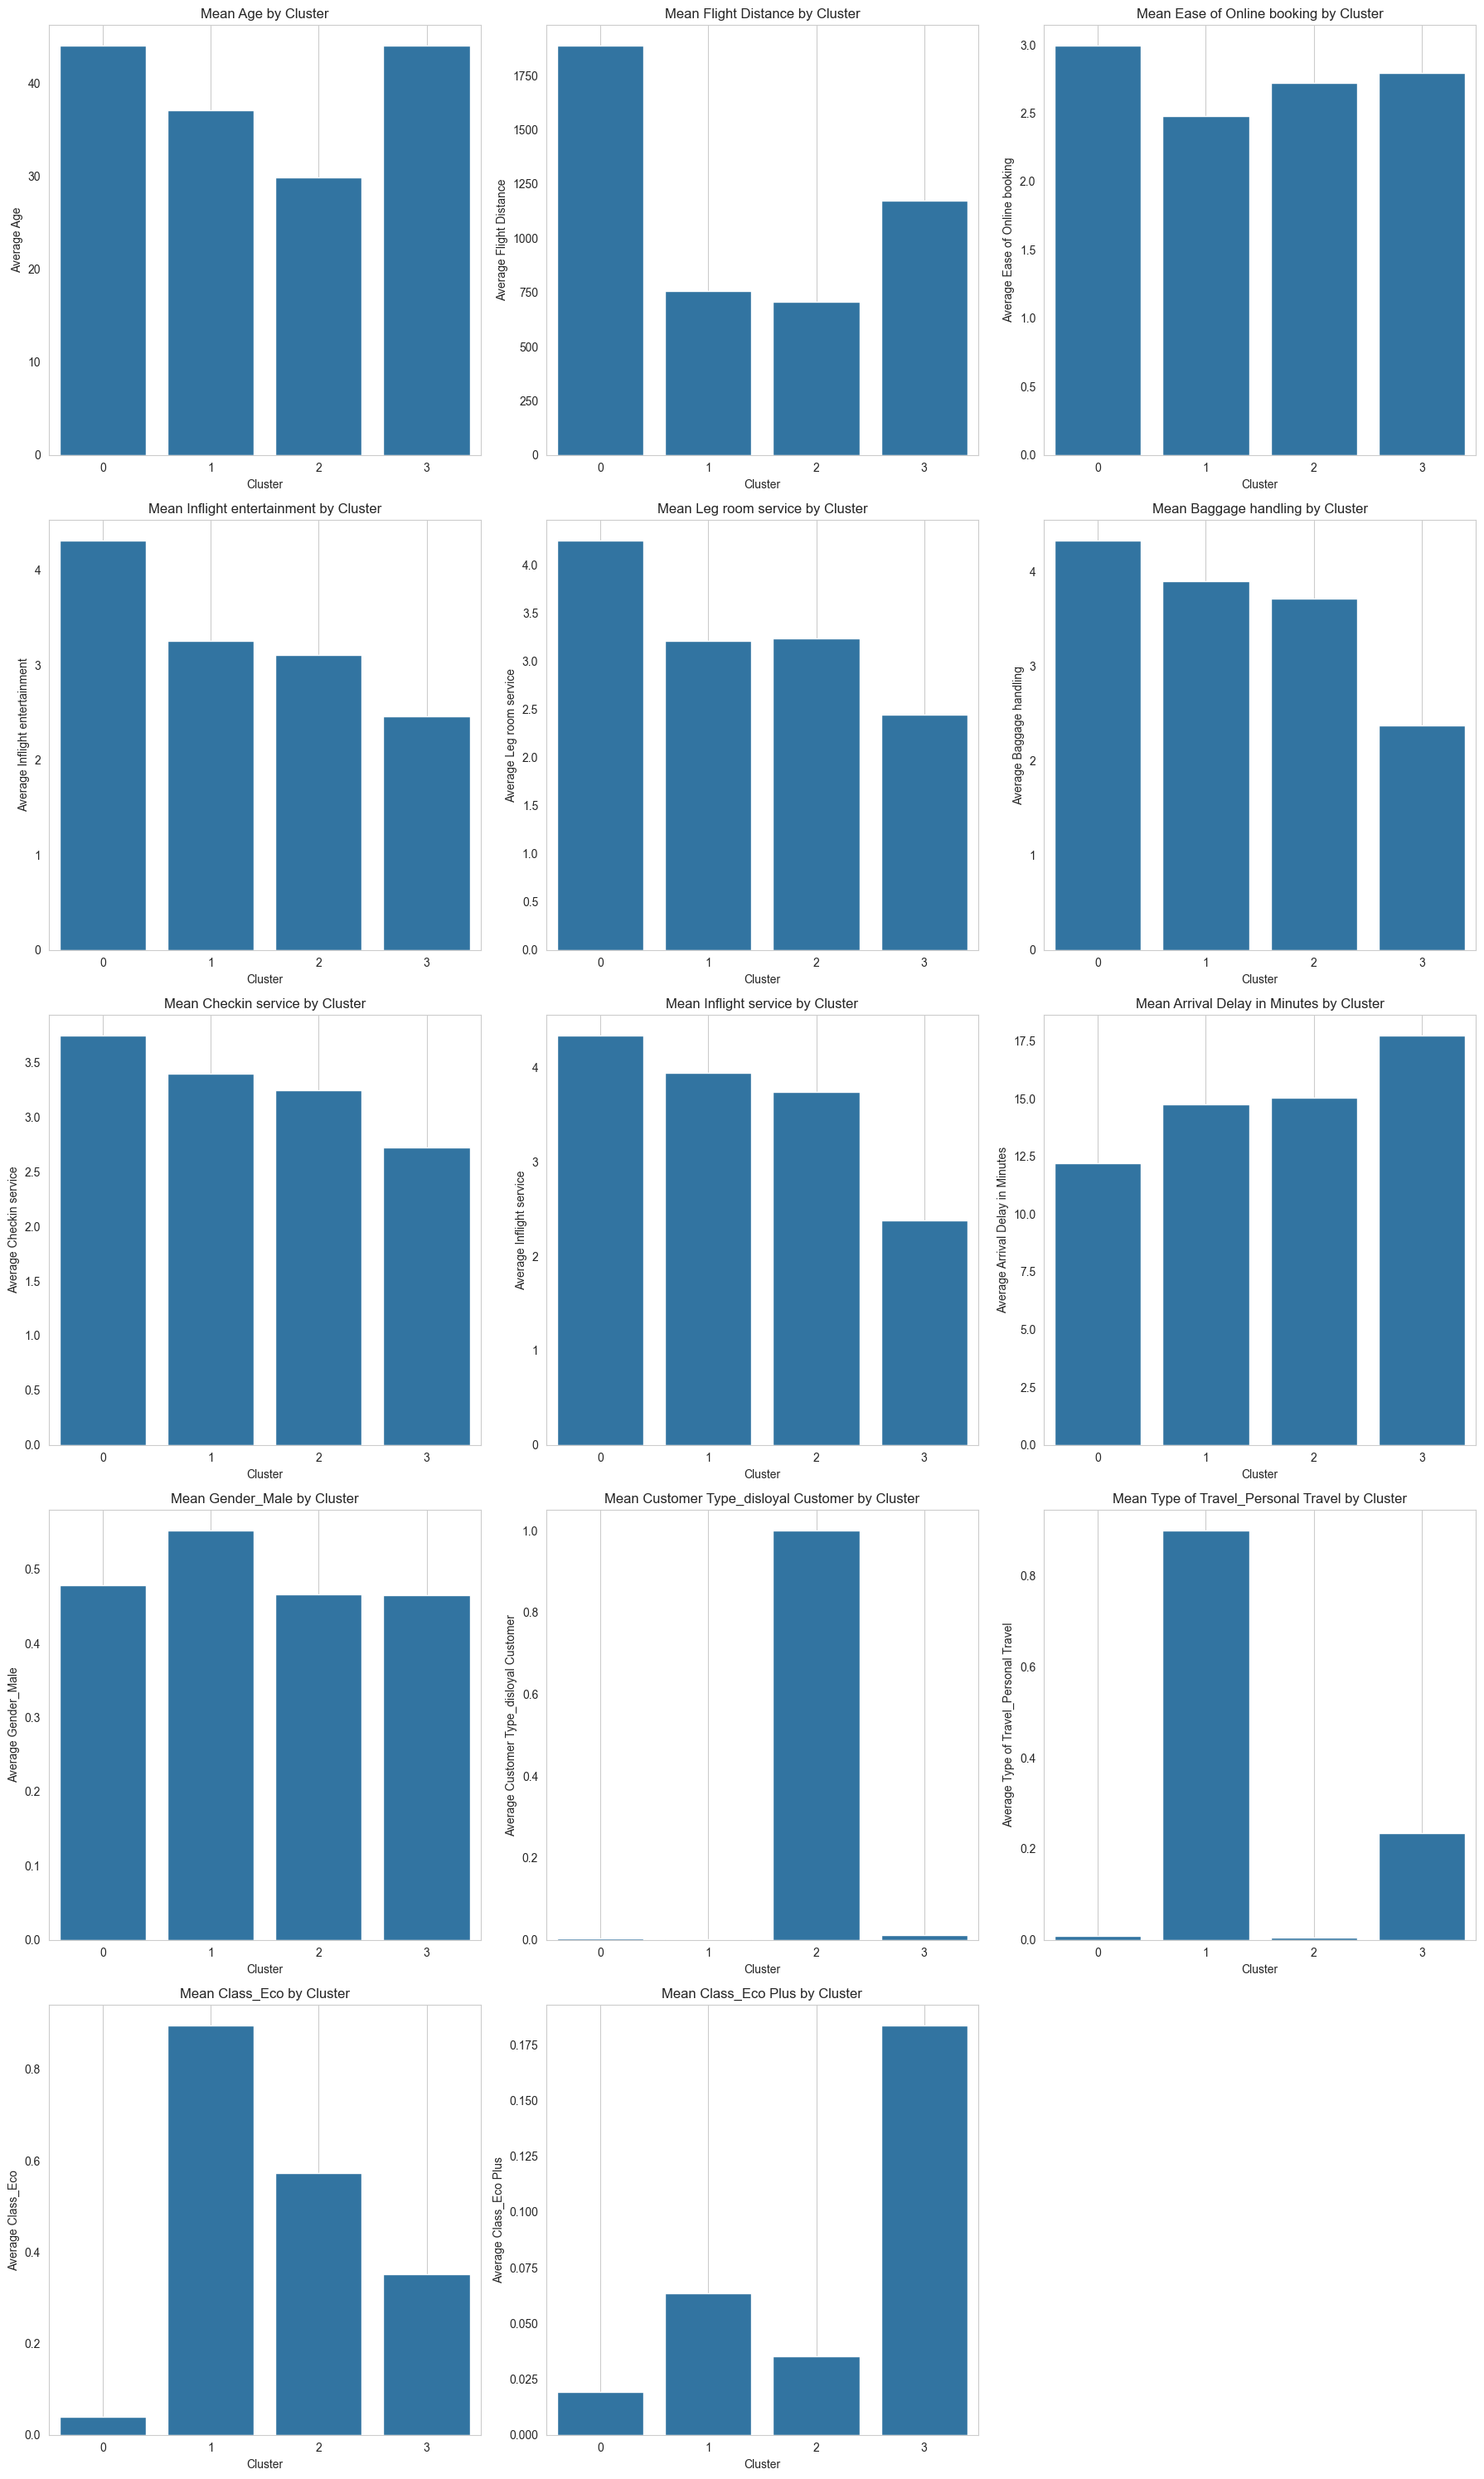

In [90]:
# Assuming 'airline_data_num' is your dataframe
features = airline_data_num.columns[:-1]

# Calculate the number of rows required
n_features = len(features)
n_cols = 3  # Number of plots per row
n_rows = (n_features + n_cols - 1) // n_cols  # Ceiling division to get rows

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6 * n_rows))
axes = axes.flatten()  # Flatten to easily iterate through axes

# Plot each feature
for idx, feature in enumerate(features):
    sns.barplot(
        data=airline_data_num,
        x='Cluster',
        y=feature,
        ci=None,
        estimator=np.mean,
        ax=axes[idx]
    )
    axes[idx].set_title(f'Mean {feature} by Cluster')
    axes[idx].set_ylabel(f'Average {feature}')
    axes[idx].set_xlabel('Cluster')
    axes[idx].grid()

# Hide any unused subplots
for idx in range(len(features), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

In [91]:
# Group the data by Cluster and calculate the mean for each feature
cluster_means = airline_data_num.groupby('Cluster').mean()

# Generate the text-based report
for cluster in cluster_means.index:
    print(f"Cluster {cluster}:")
    for feature, value in cluster_means.loc[cluster].items():
        print(f"  Feature: {feature}: {value:.2f}")
    print("-" * 40)

Cluster 0:
  Feature: Age: 44.10
  Feature: Flight Distance: 1888.53
  Feature: Ease of Online booking: 2.99
  Feature: Inflight entertainment: 4.31
  Feature: Leg room service: 4.25
  Feature: Baggage handling: 4.33
  Feature: Checkin service: 3.75
  Feature: Inflight service: 4.34
  Feature: Arrival Delay in Minutes: 12.19
  Feature: Gender_Male: 0.48
  Feature: Customer Type_disloyal Customer: 0.00
  Feature: Type of Travel_Personal Travel: 0.01
  Feature: Class_Eco: 0.04
  Feature: Class_Eco Plus: 0.02
----------------------------------------
Cluster 1:
  Feature: Age: 37.11
  Feature: Flight Distance: 758.23
  Feature: Ease of Online booking: 2.48
  Feature: Inflight entertainment: 3.25
  Feature: Leg room service: 3.21
  Feature: Baggage handling: 3.90
  Feature: Checkin service: 3.39
  Feature: Inflight service: 3.94
  Feature: Arrival Delay in Minutes: 14.76
  Feature: Gender_Male: 0.55
  Feature: Customer Type_disloyal Customer: 0.00
  Feature: Type of Travel_Personal Travel: 